<a href="https://colab.research.google.com/github/santhiravuri/generative-ai-internship/blob/main/day20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Task: "Attention Drop Experiment" involves:

Masking a token with high attention and one with low attention.

Measuring the change in output embeddings or predictions."""
# ✅ Step 1: Install & import necessary libraries
!pip install transformers matplotlib seaborn --quiet

import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# ✅ Step 2: Load tokenizer and models
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)
mlm_model = BertForMaskedLM.from_pretrained("bert-base-uncased")
model.eval()
mlm_model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [ ]:
# ✅ Step 3: Choose a sentence and tokenize it
sentence = "The cat sat on the mat"
inputs = tokenizer(sentence, return_tensors="pt")
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])


In [ ]:
# Step 4: Run model and get all attentions
with torch.no_grad():
    outputs = model(**inputs)
    attentions = torch.stack(outputs.attentions)  # (layers, batch, heads, seq_len, seq_len)


In [ ]:
# Step 5: Full average attention score for each token (received attention)
# Average over layers, then over heads
avg_attention = attentions.mean(dim=0).mean(dim=1)[0]  # (seq_len, seq_len)
token_attention_scores = avg_attention.mean(dim=0).numpy()  # attention received by each token

# Also calculate how much attention each token gives
attention_given_scores = avg_attention.mean(dim=1).numpy()


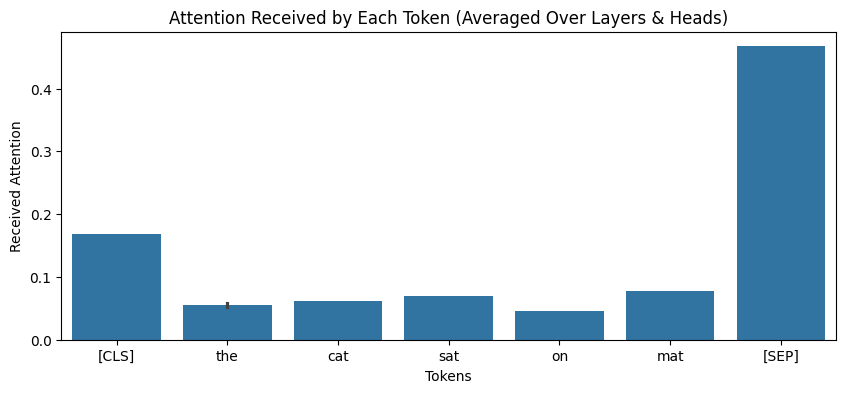

In [ ]:
# Step 6: Plot attention received by each token
plt.figure(figsize=(10, 4))
sns.barplot(x=tokens, y=token_attention_scores)
plt.title("Attention Received by Each Token (Averaged Over Layers & Heads)")
plt.ylabel("Received Attention")
plt.xlabel("Tokens")
plt.show()

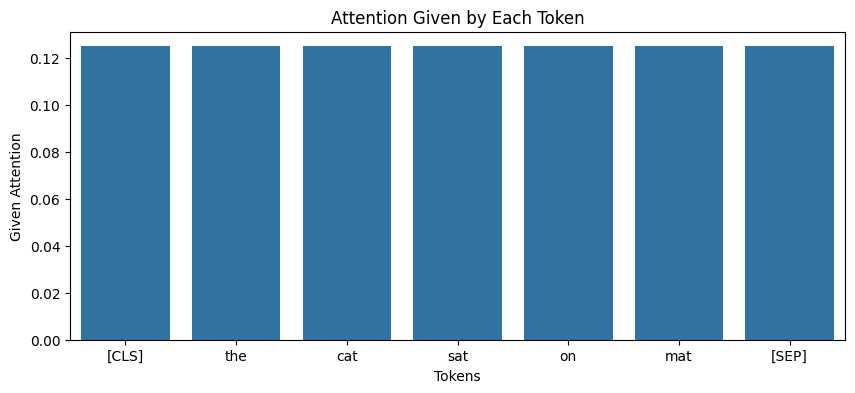

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=tokens, y=attention_given_scores)
plt.title("Attention Given by Each Token")
plt.ylabel("Given Attention")
plt.xlabel("Tokens")
plt.show()


🔍 Layer 1/12


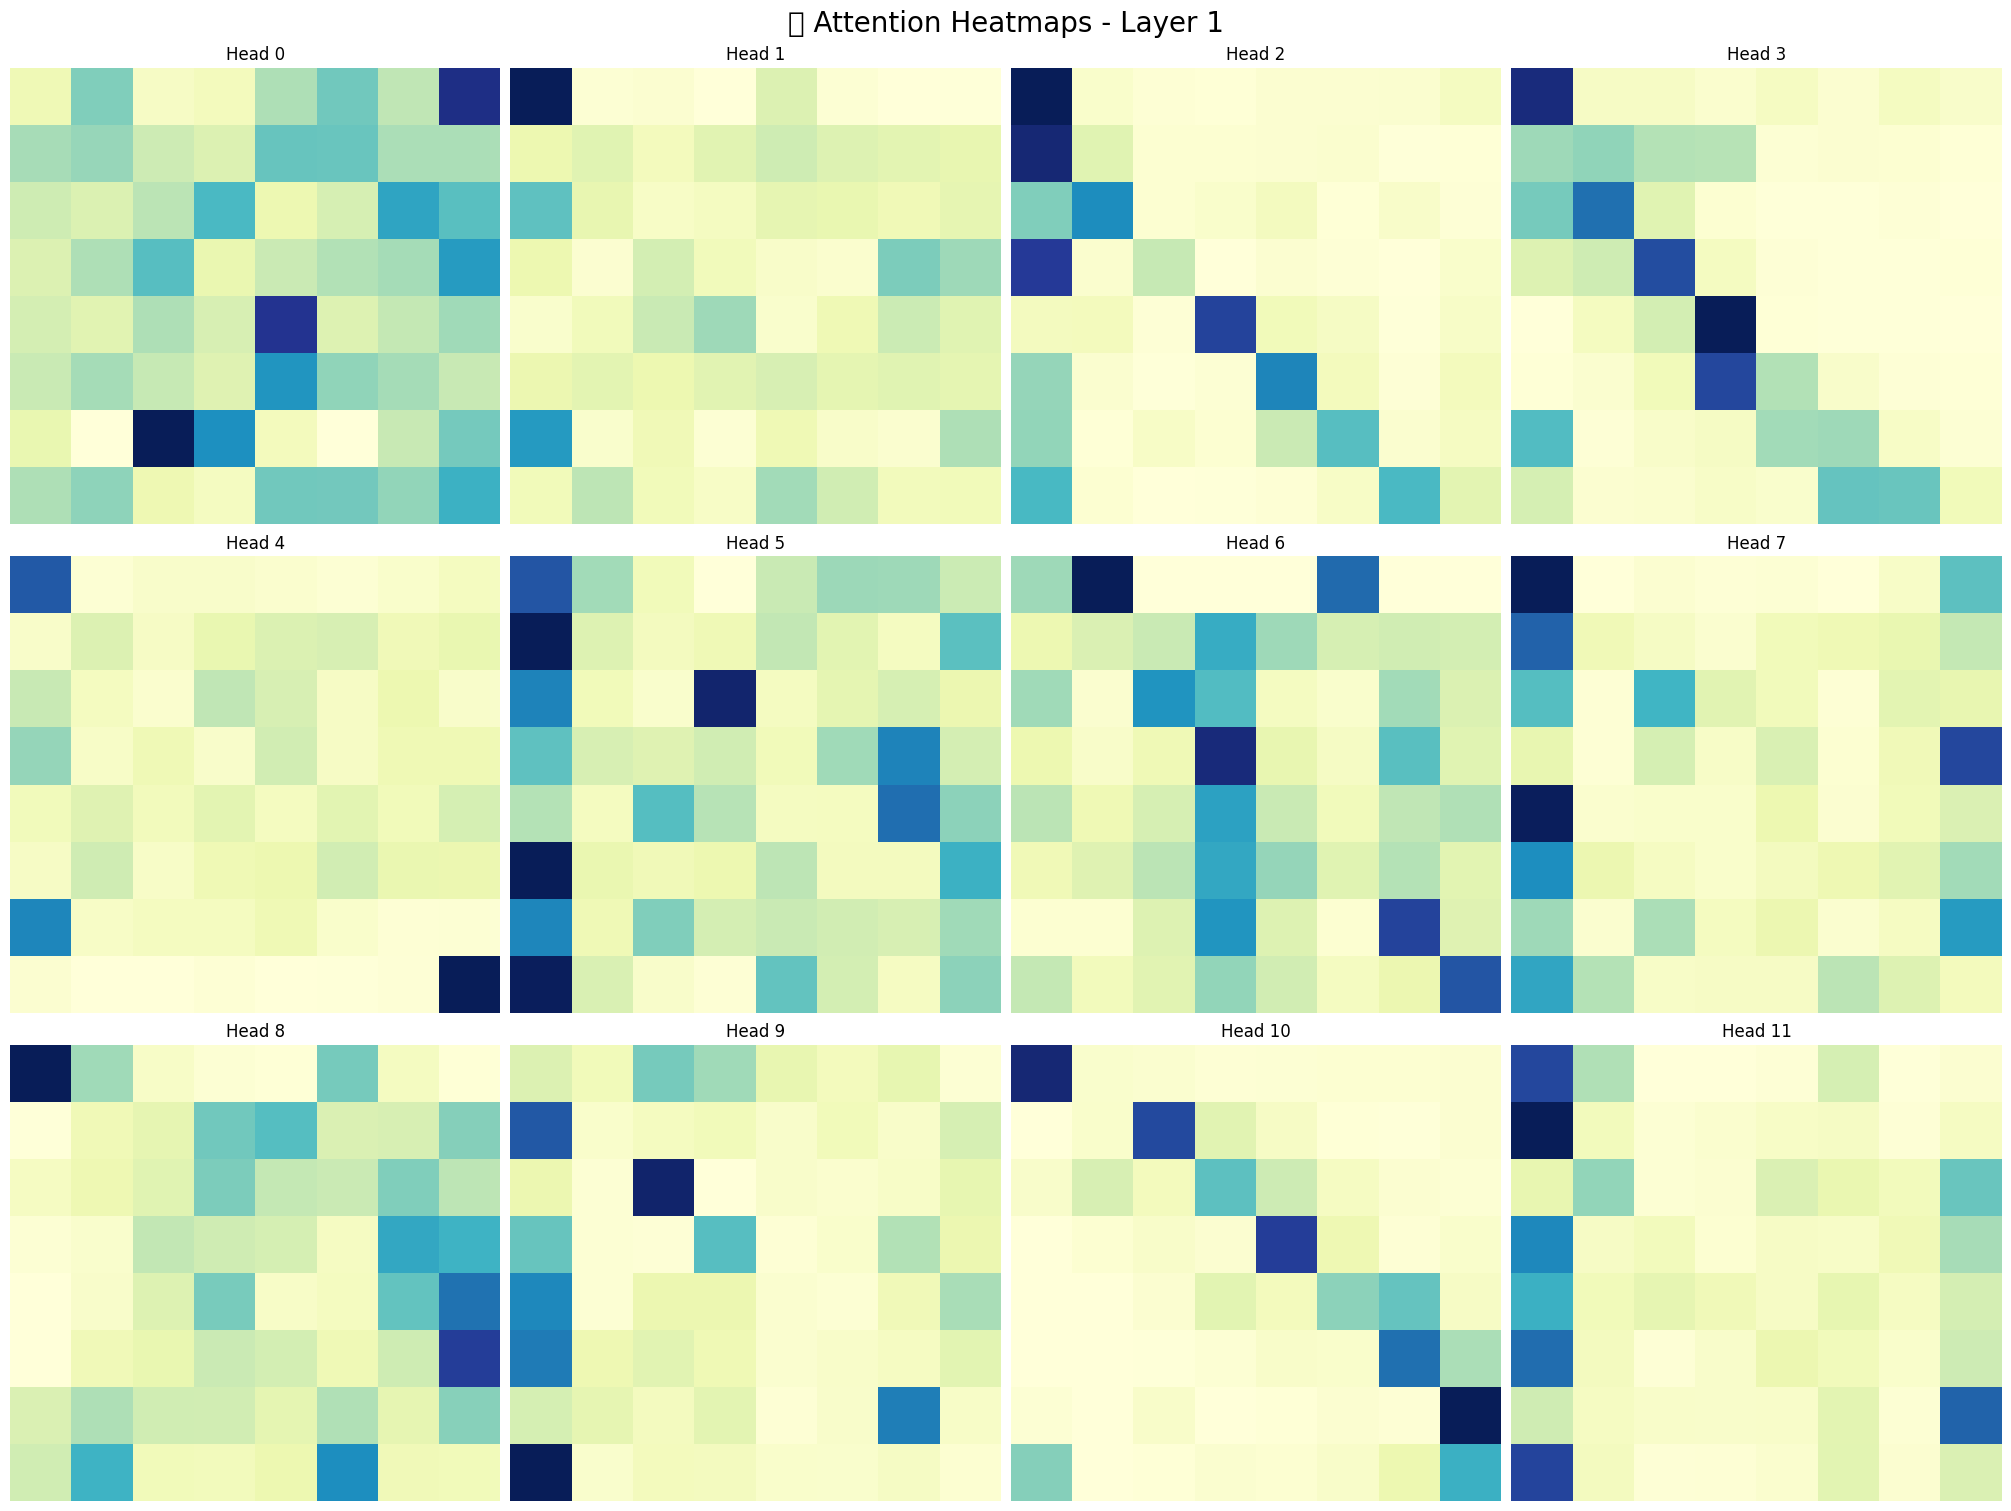


🔍 Layer 2/12


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


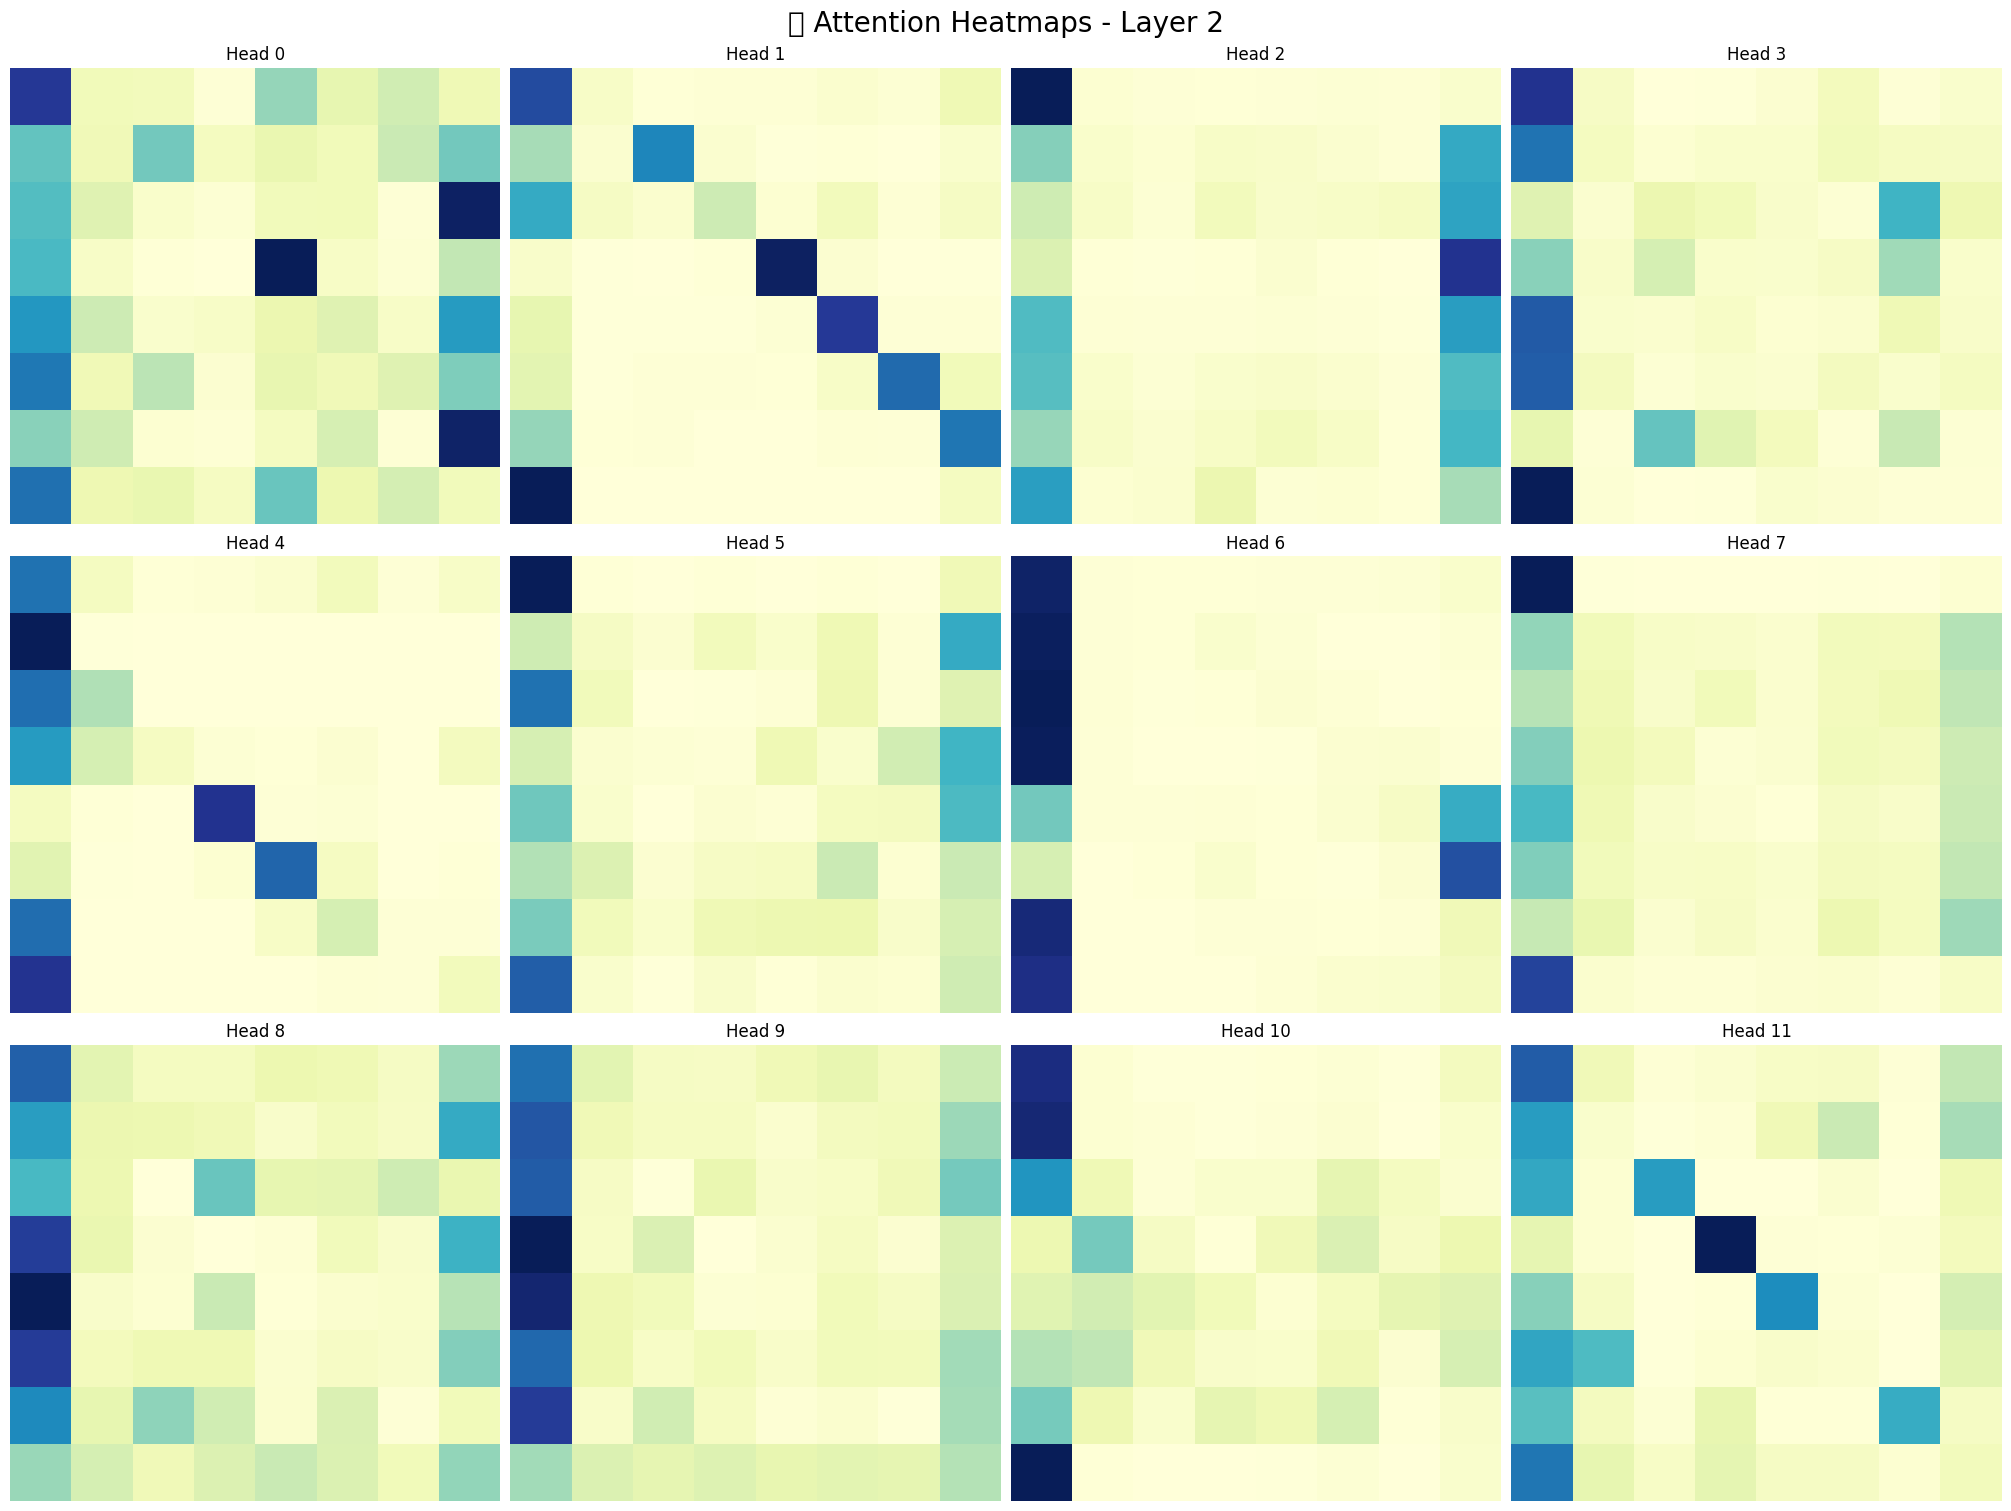


🔍 Layer 3/12


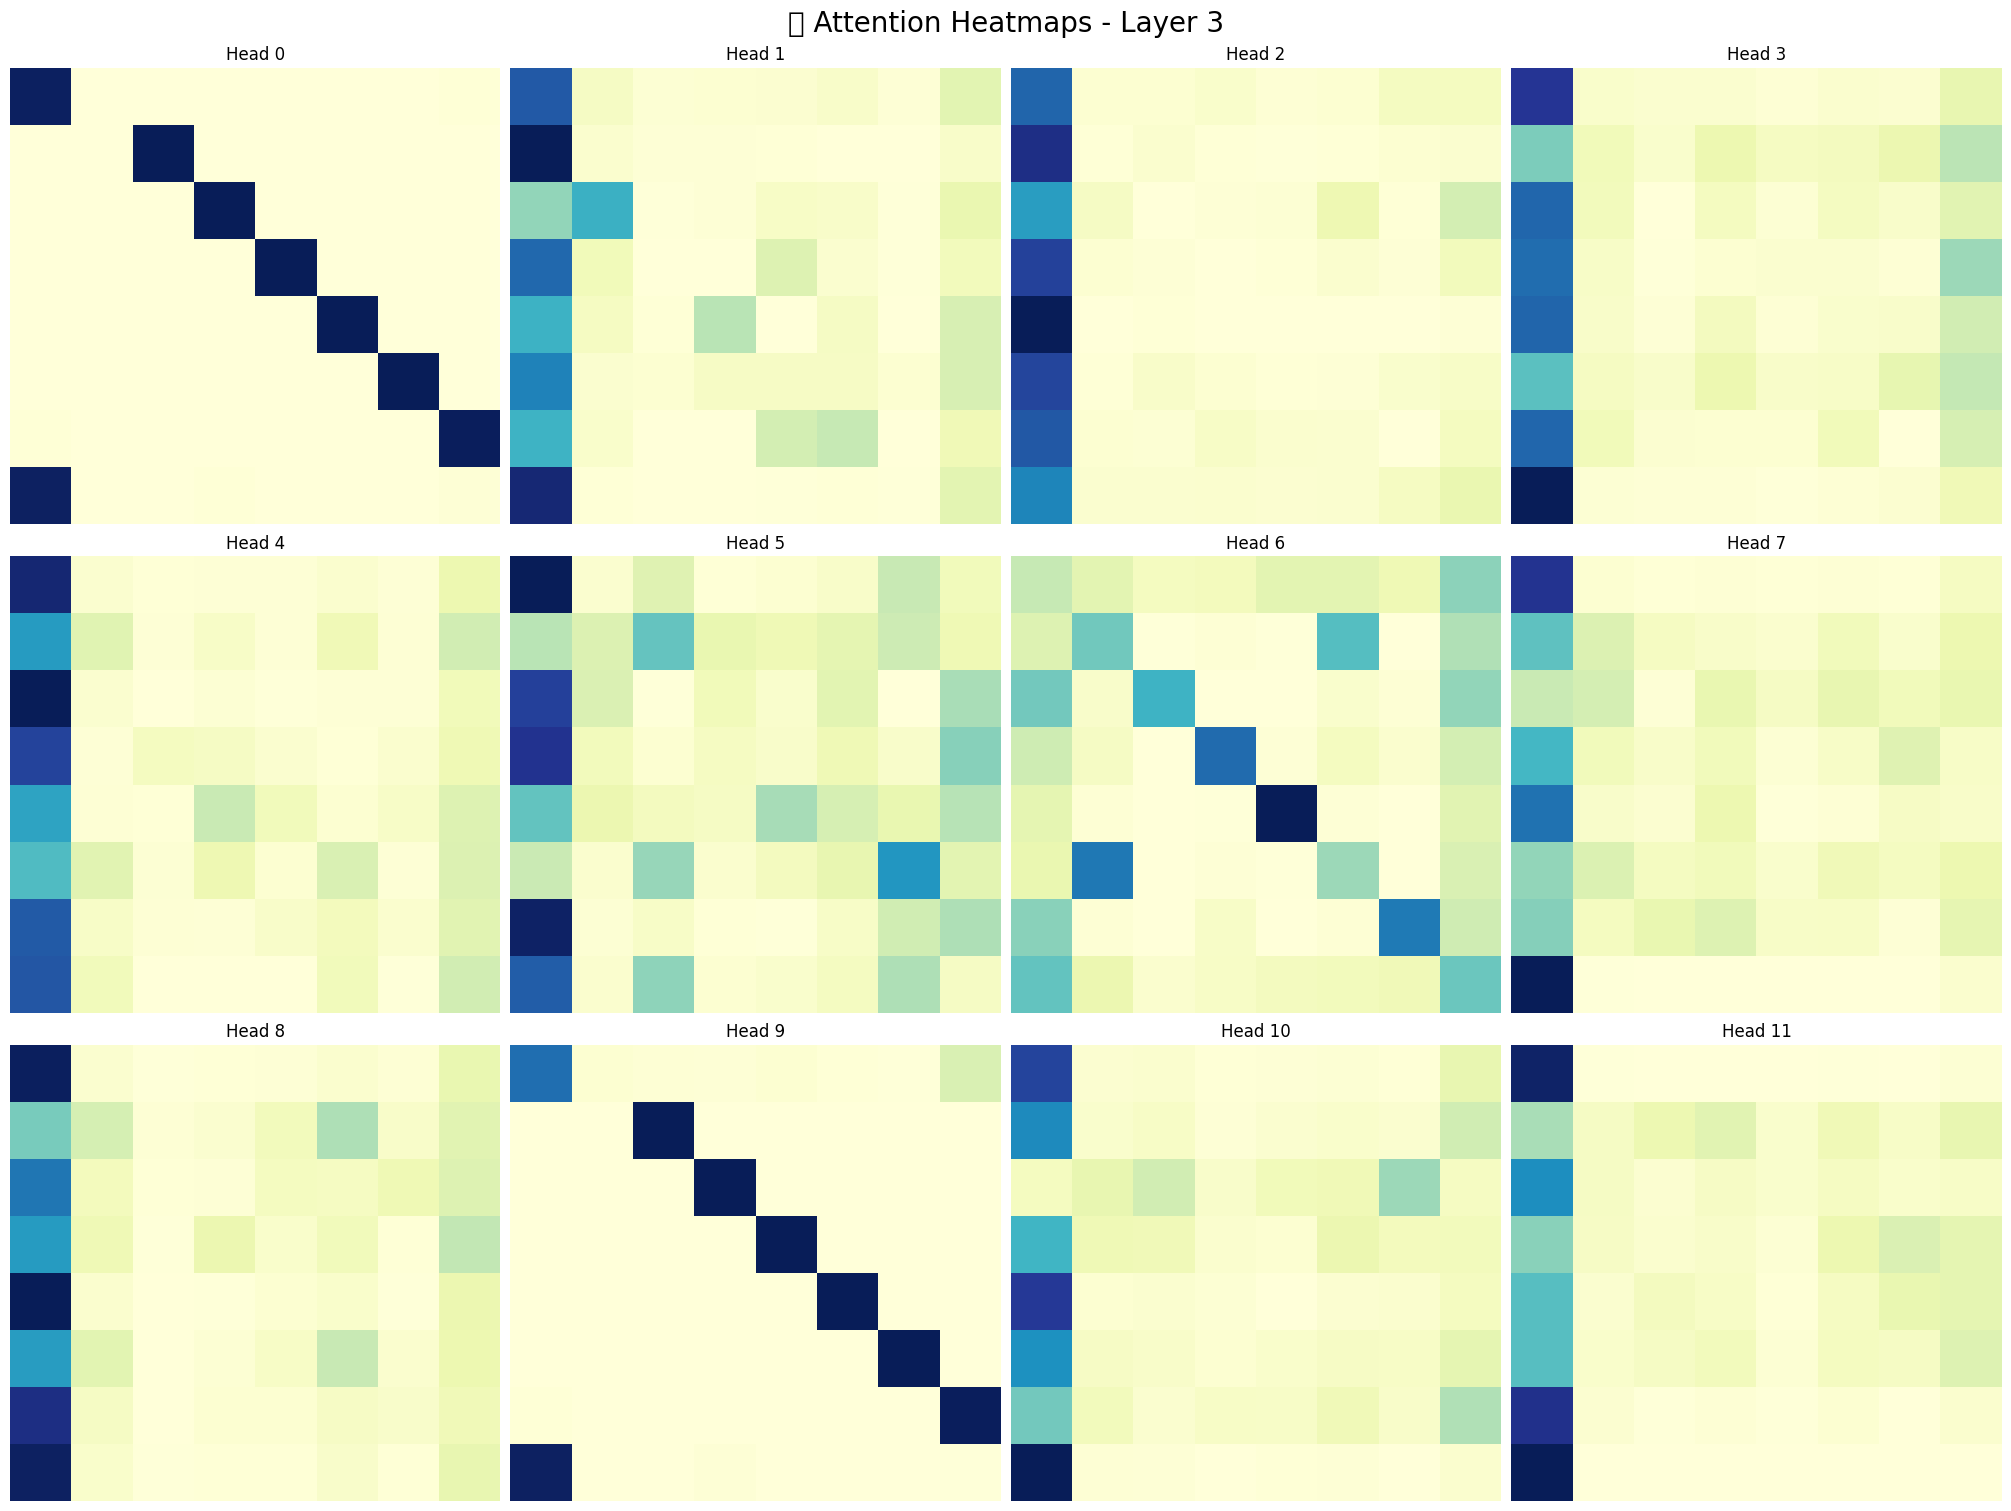


🔍 Layer 4/12


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


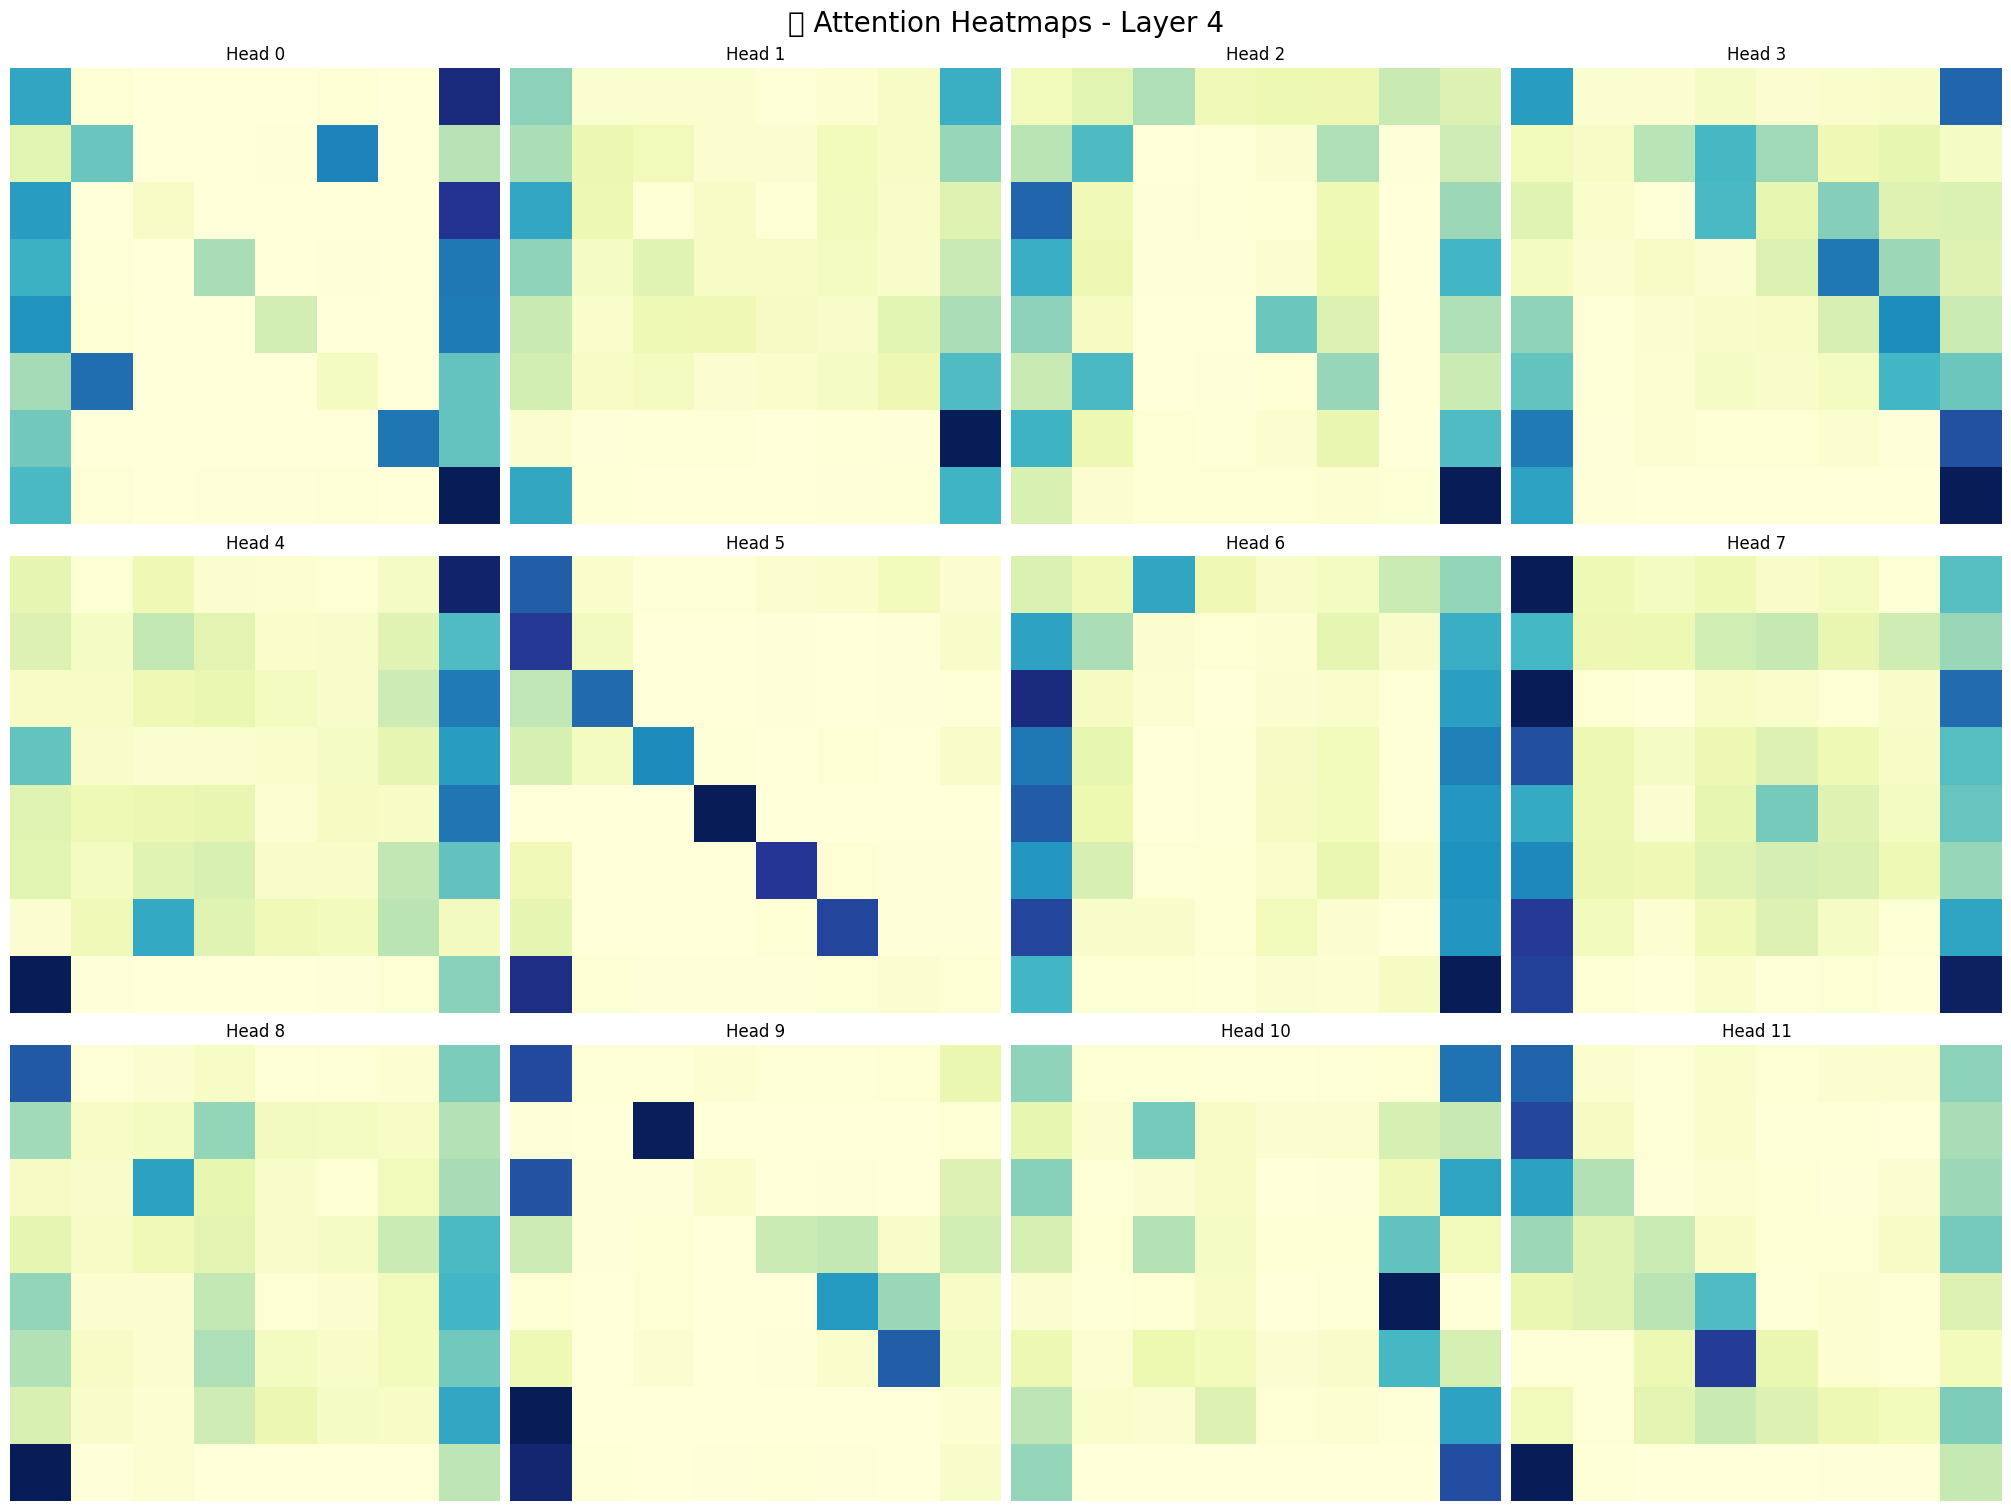


🔍 Layer 5/12


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


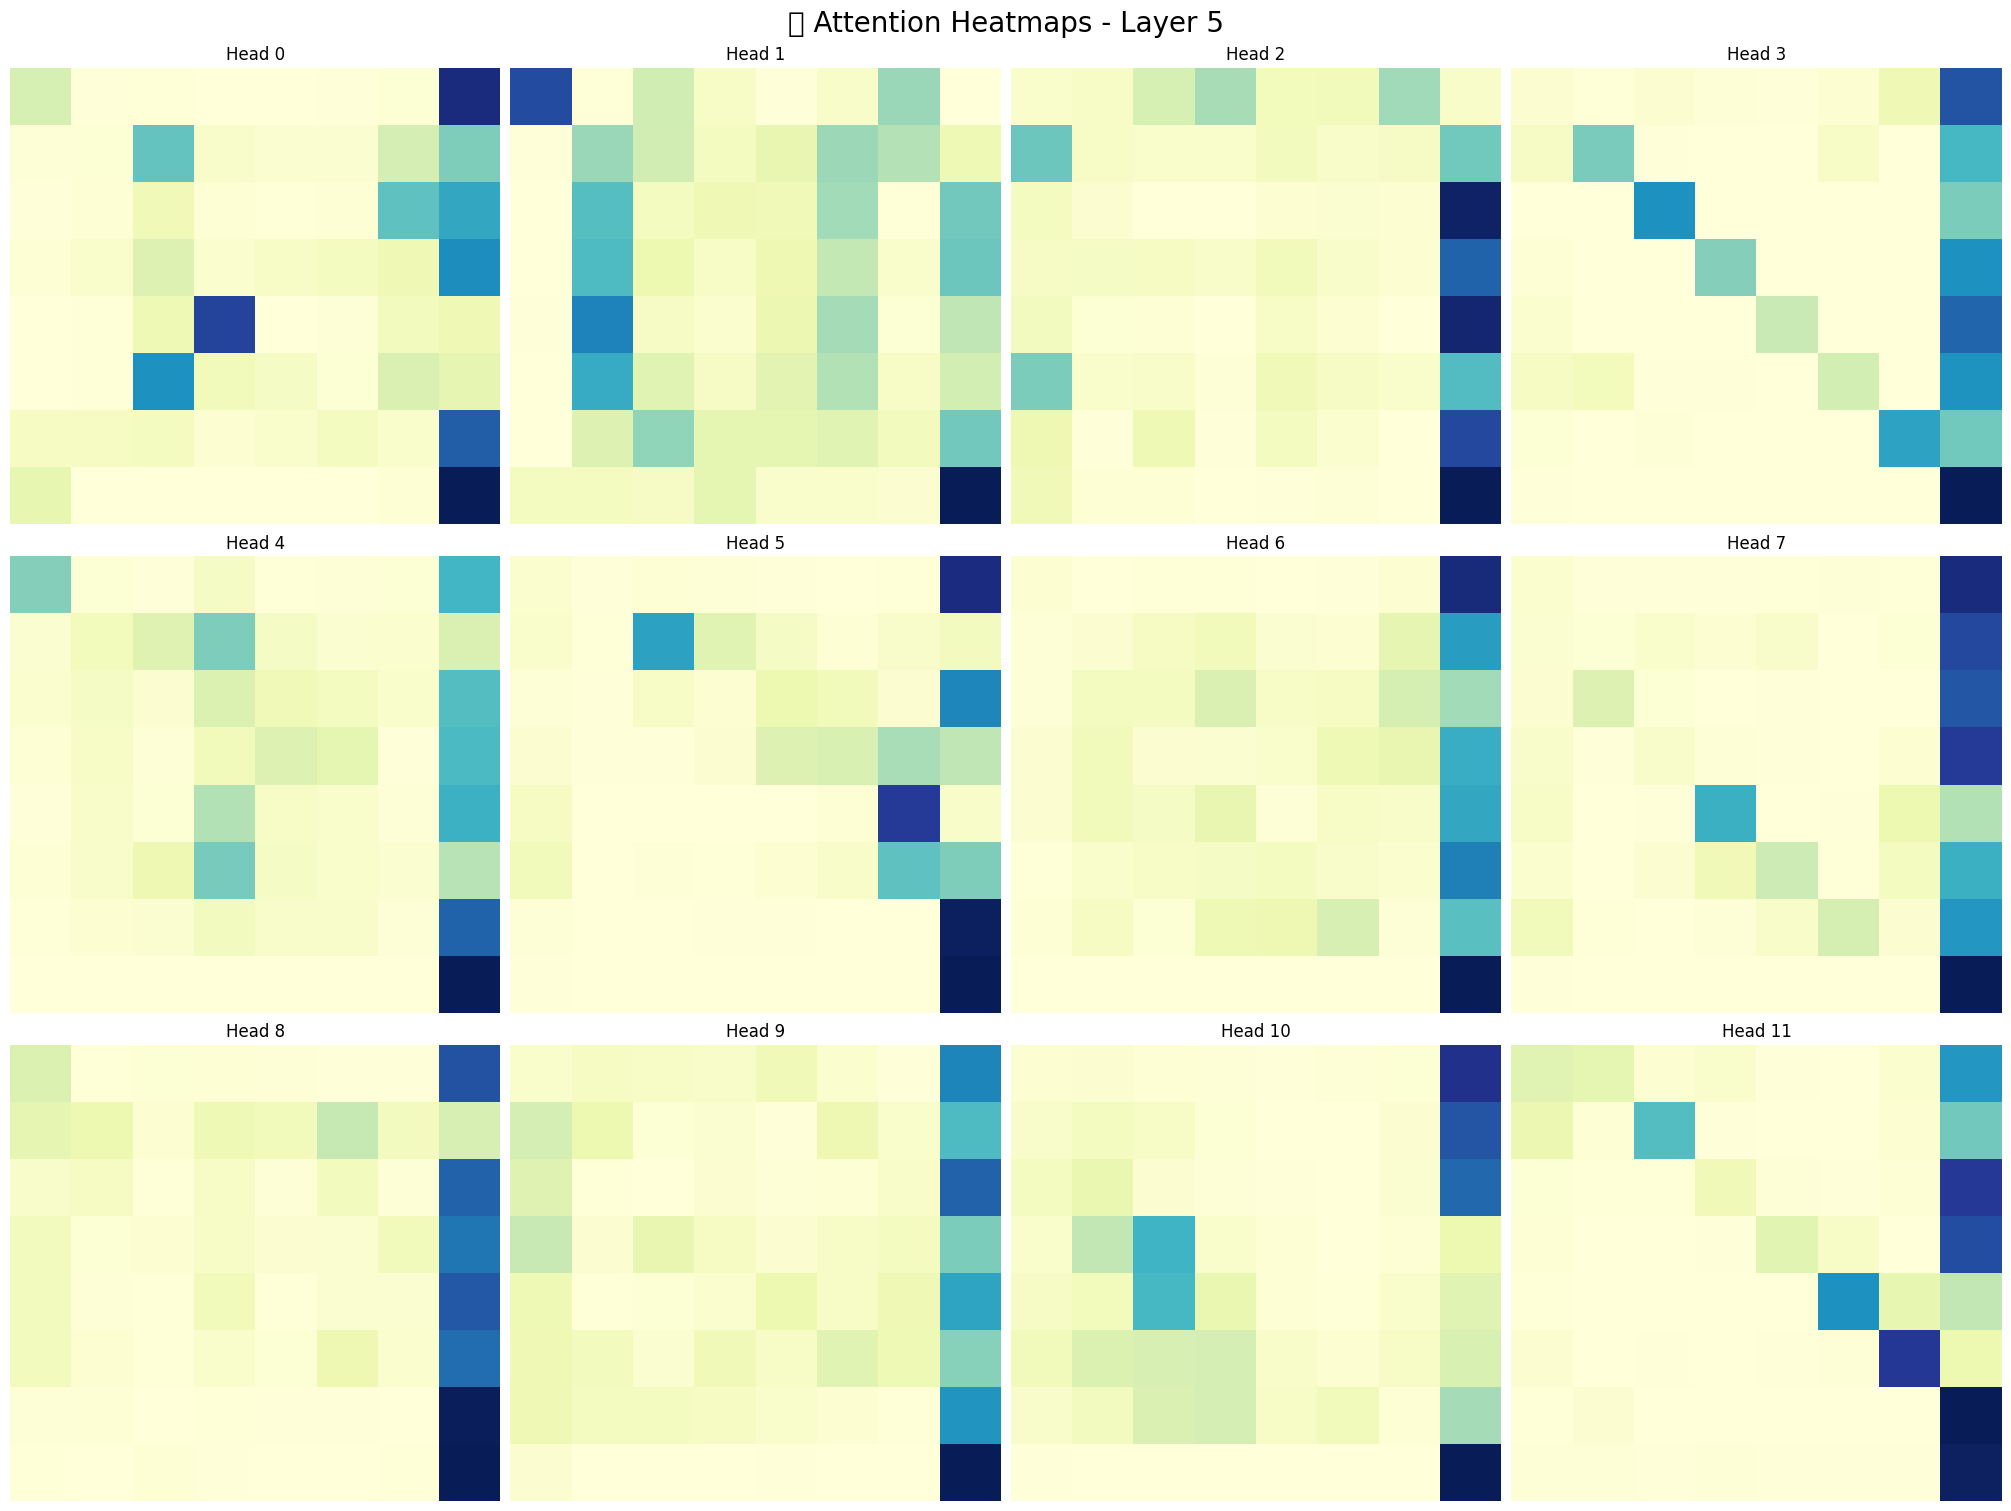


🔍 Layer 6/12


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


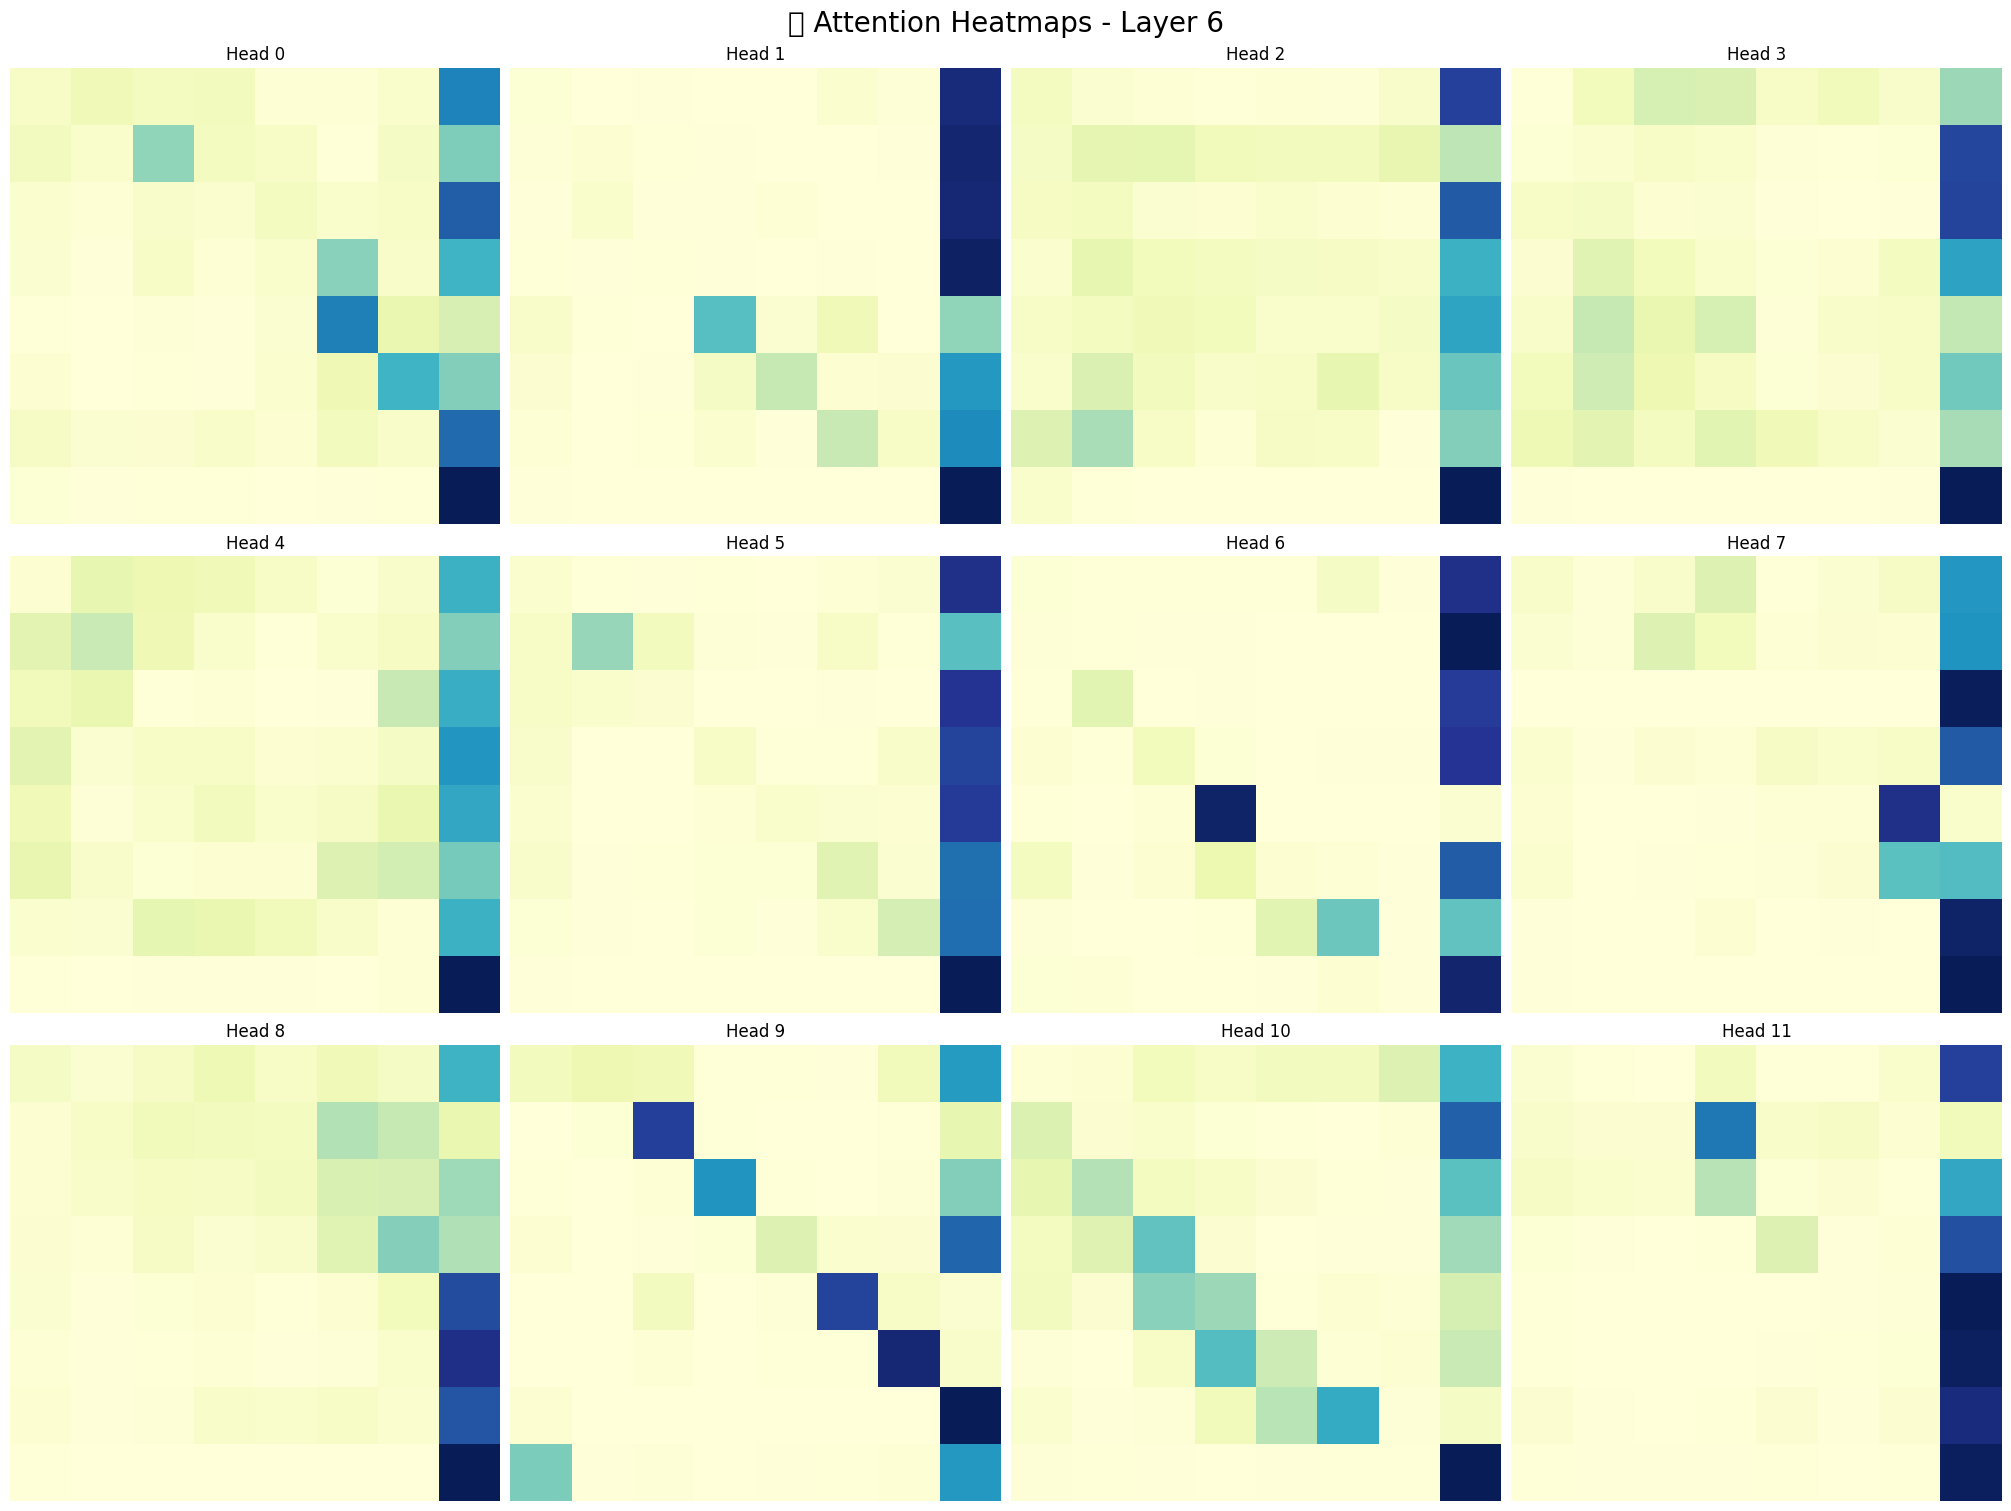


🔍 Layer 7/12


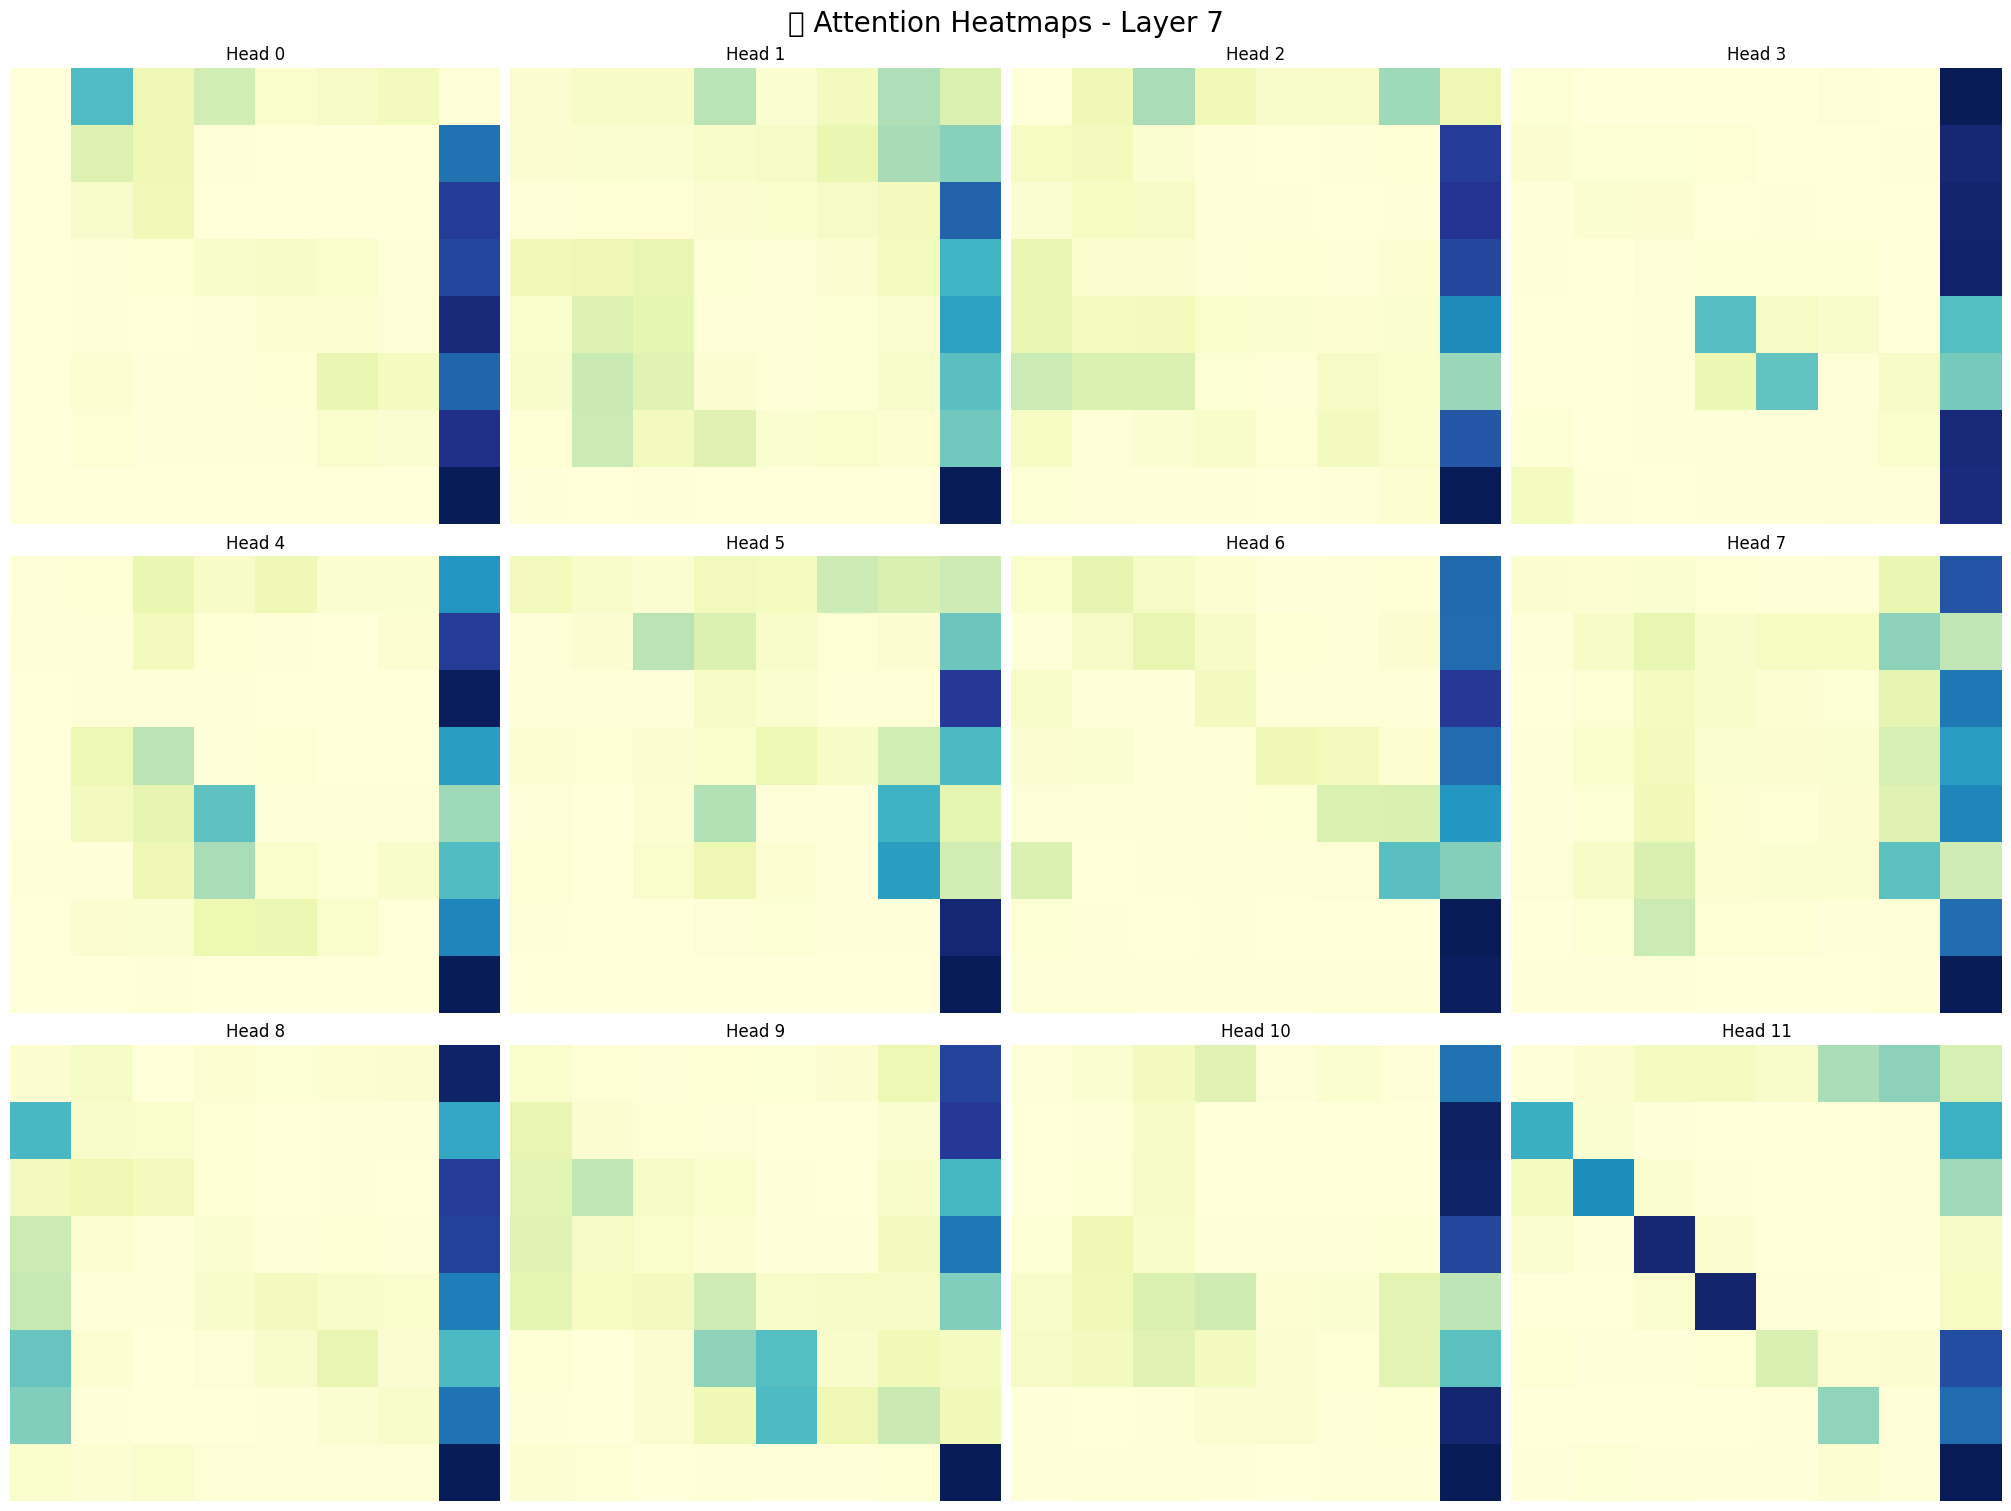


🔍 Layer 8/12


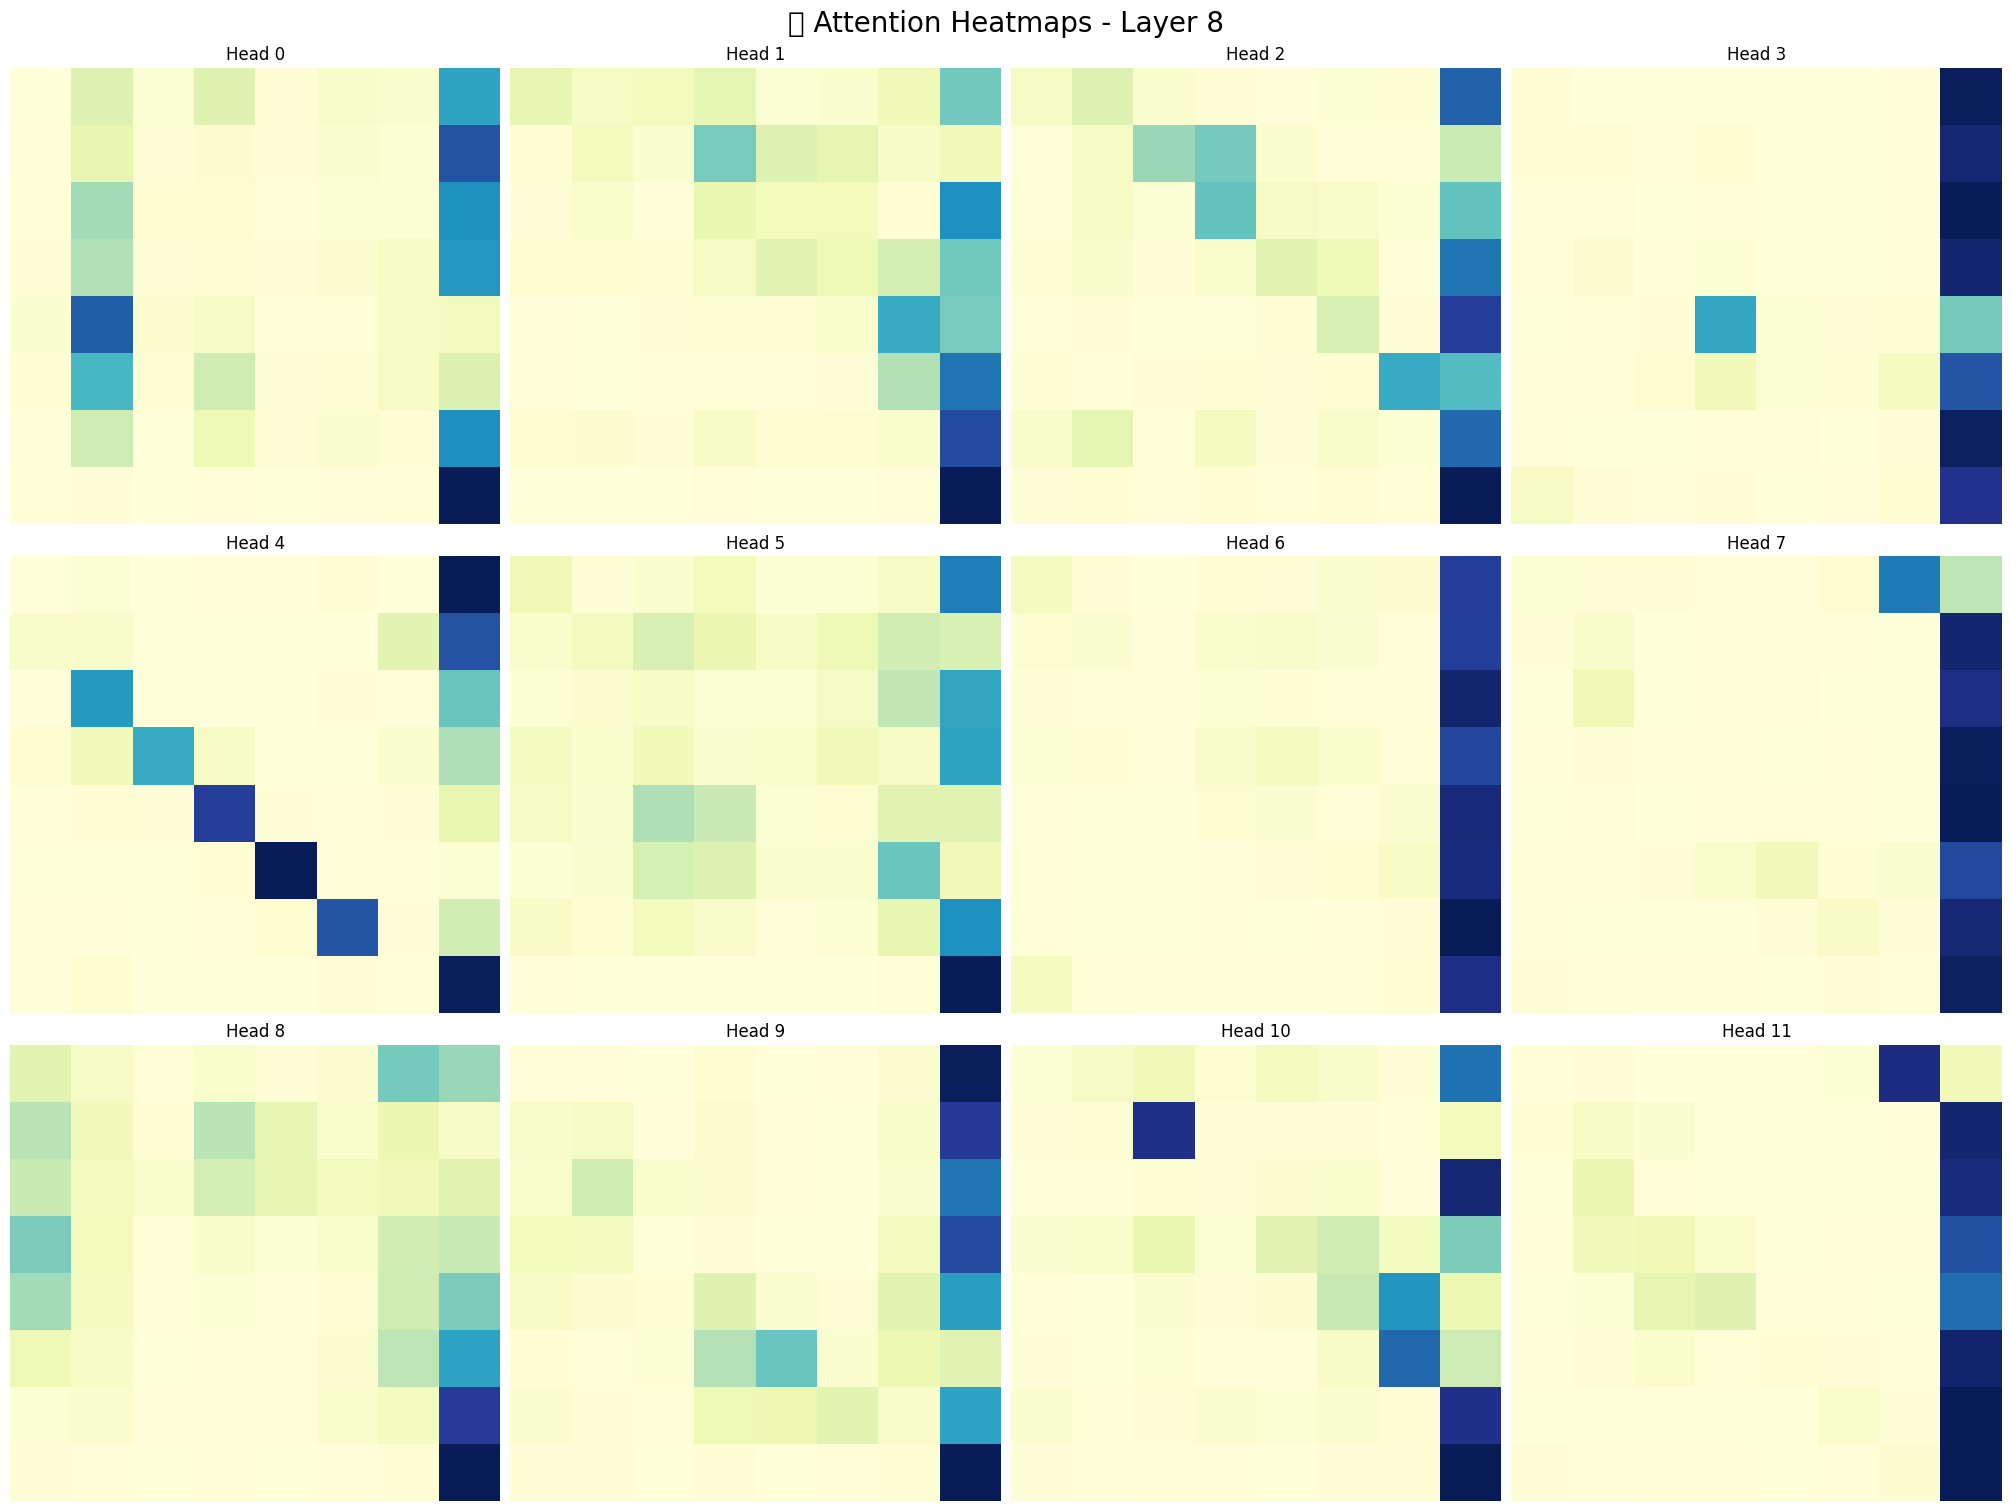


🔍 Layer 9/12


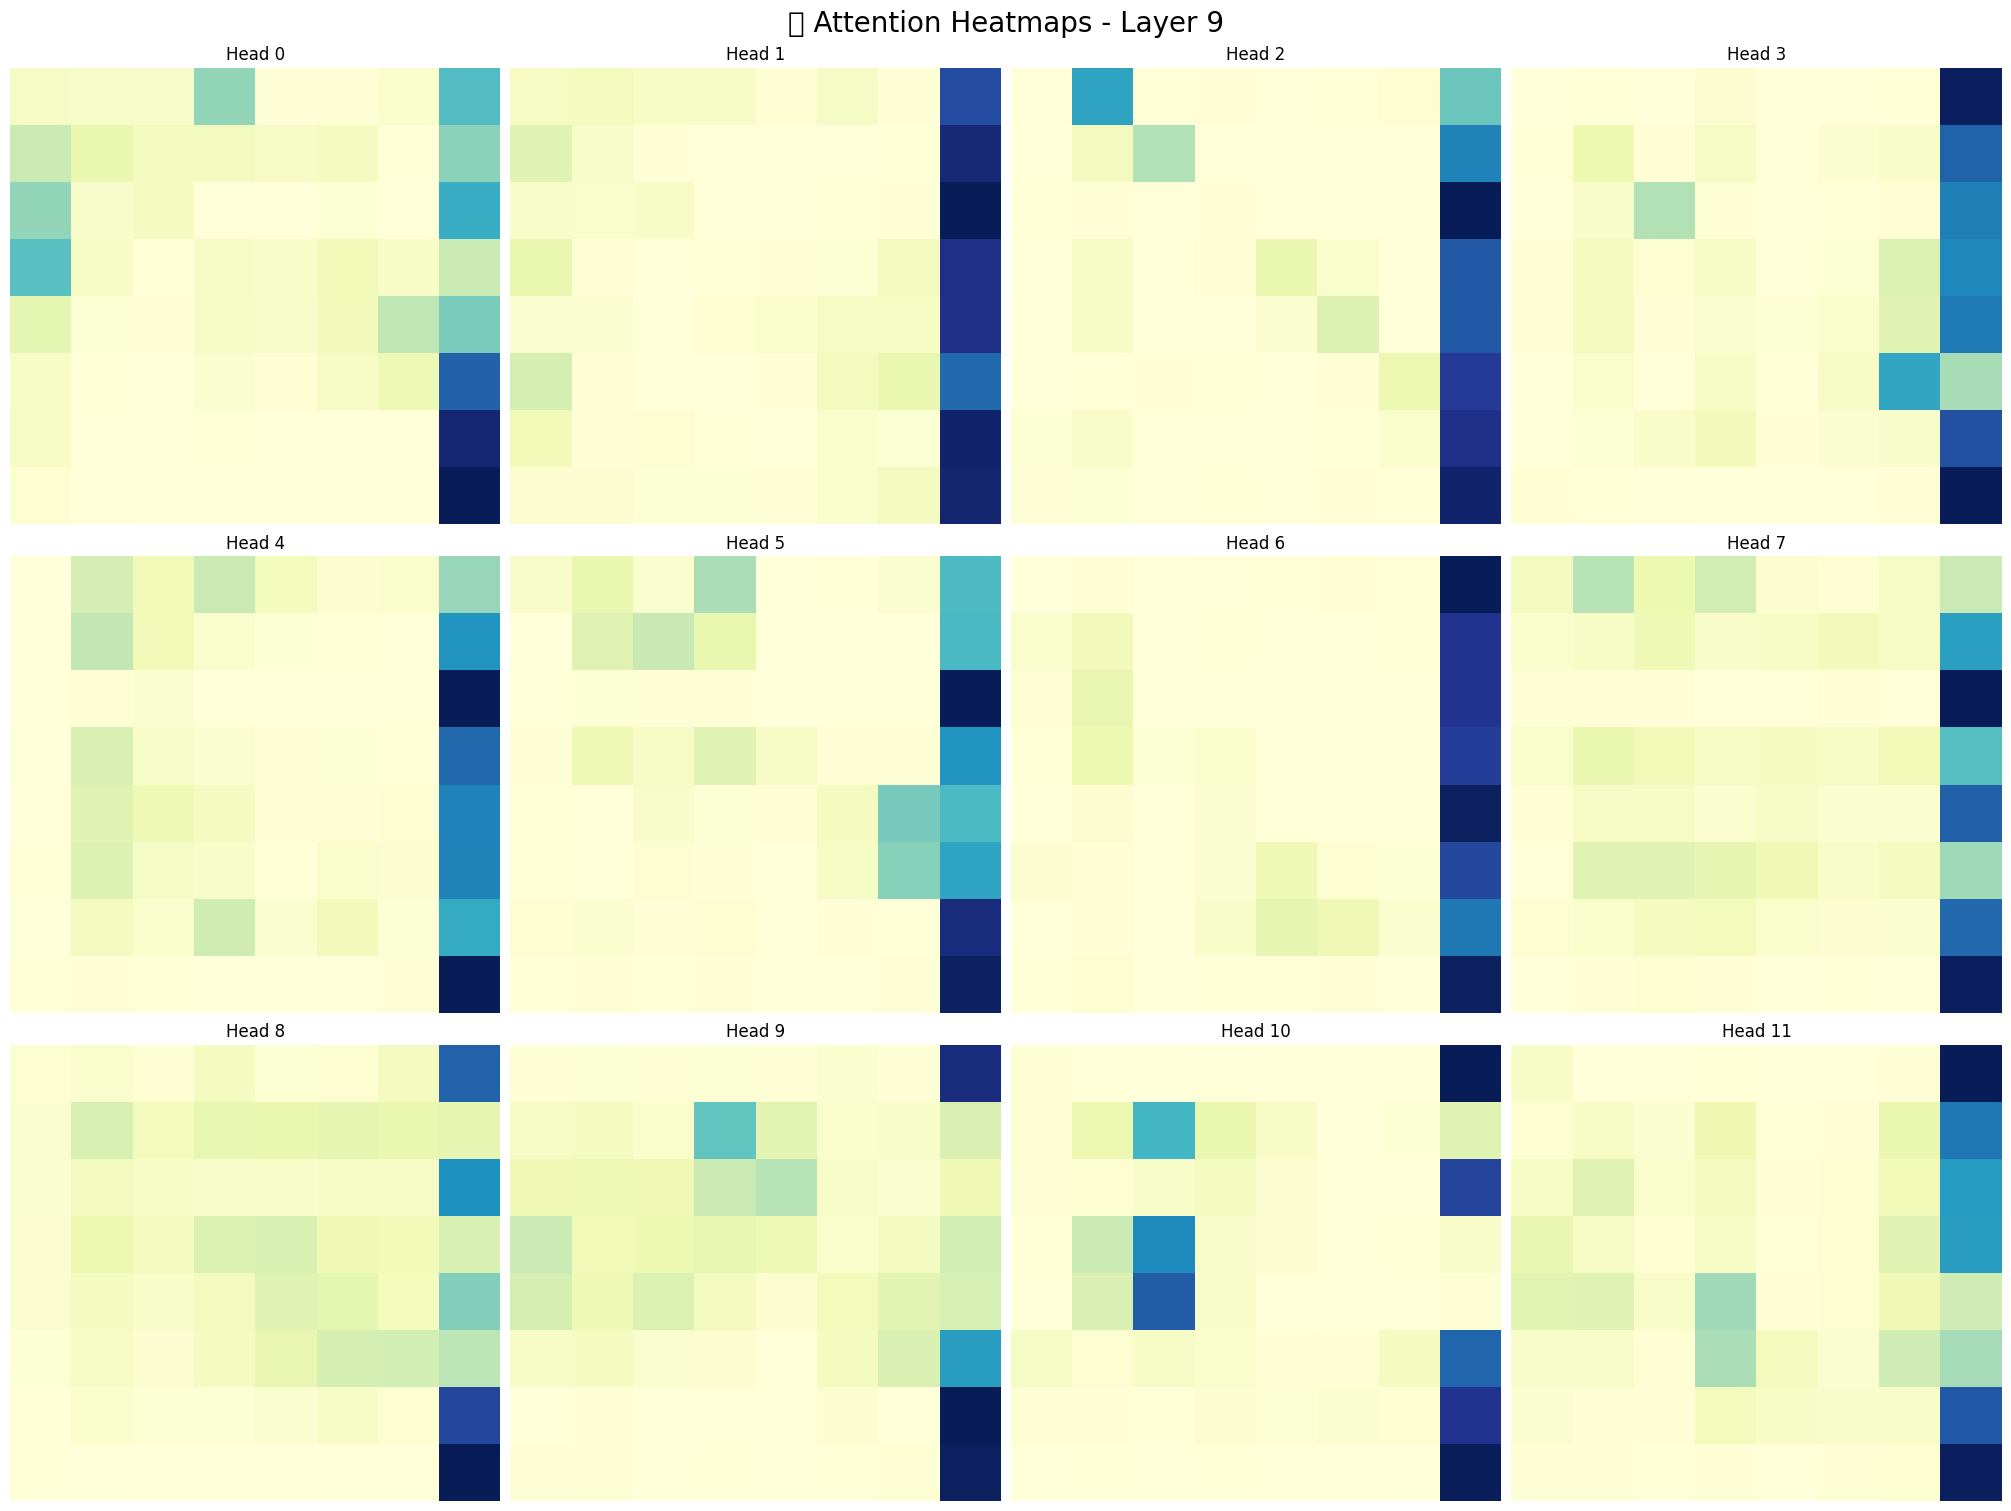


🔍 Layer 10/12


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


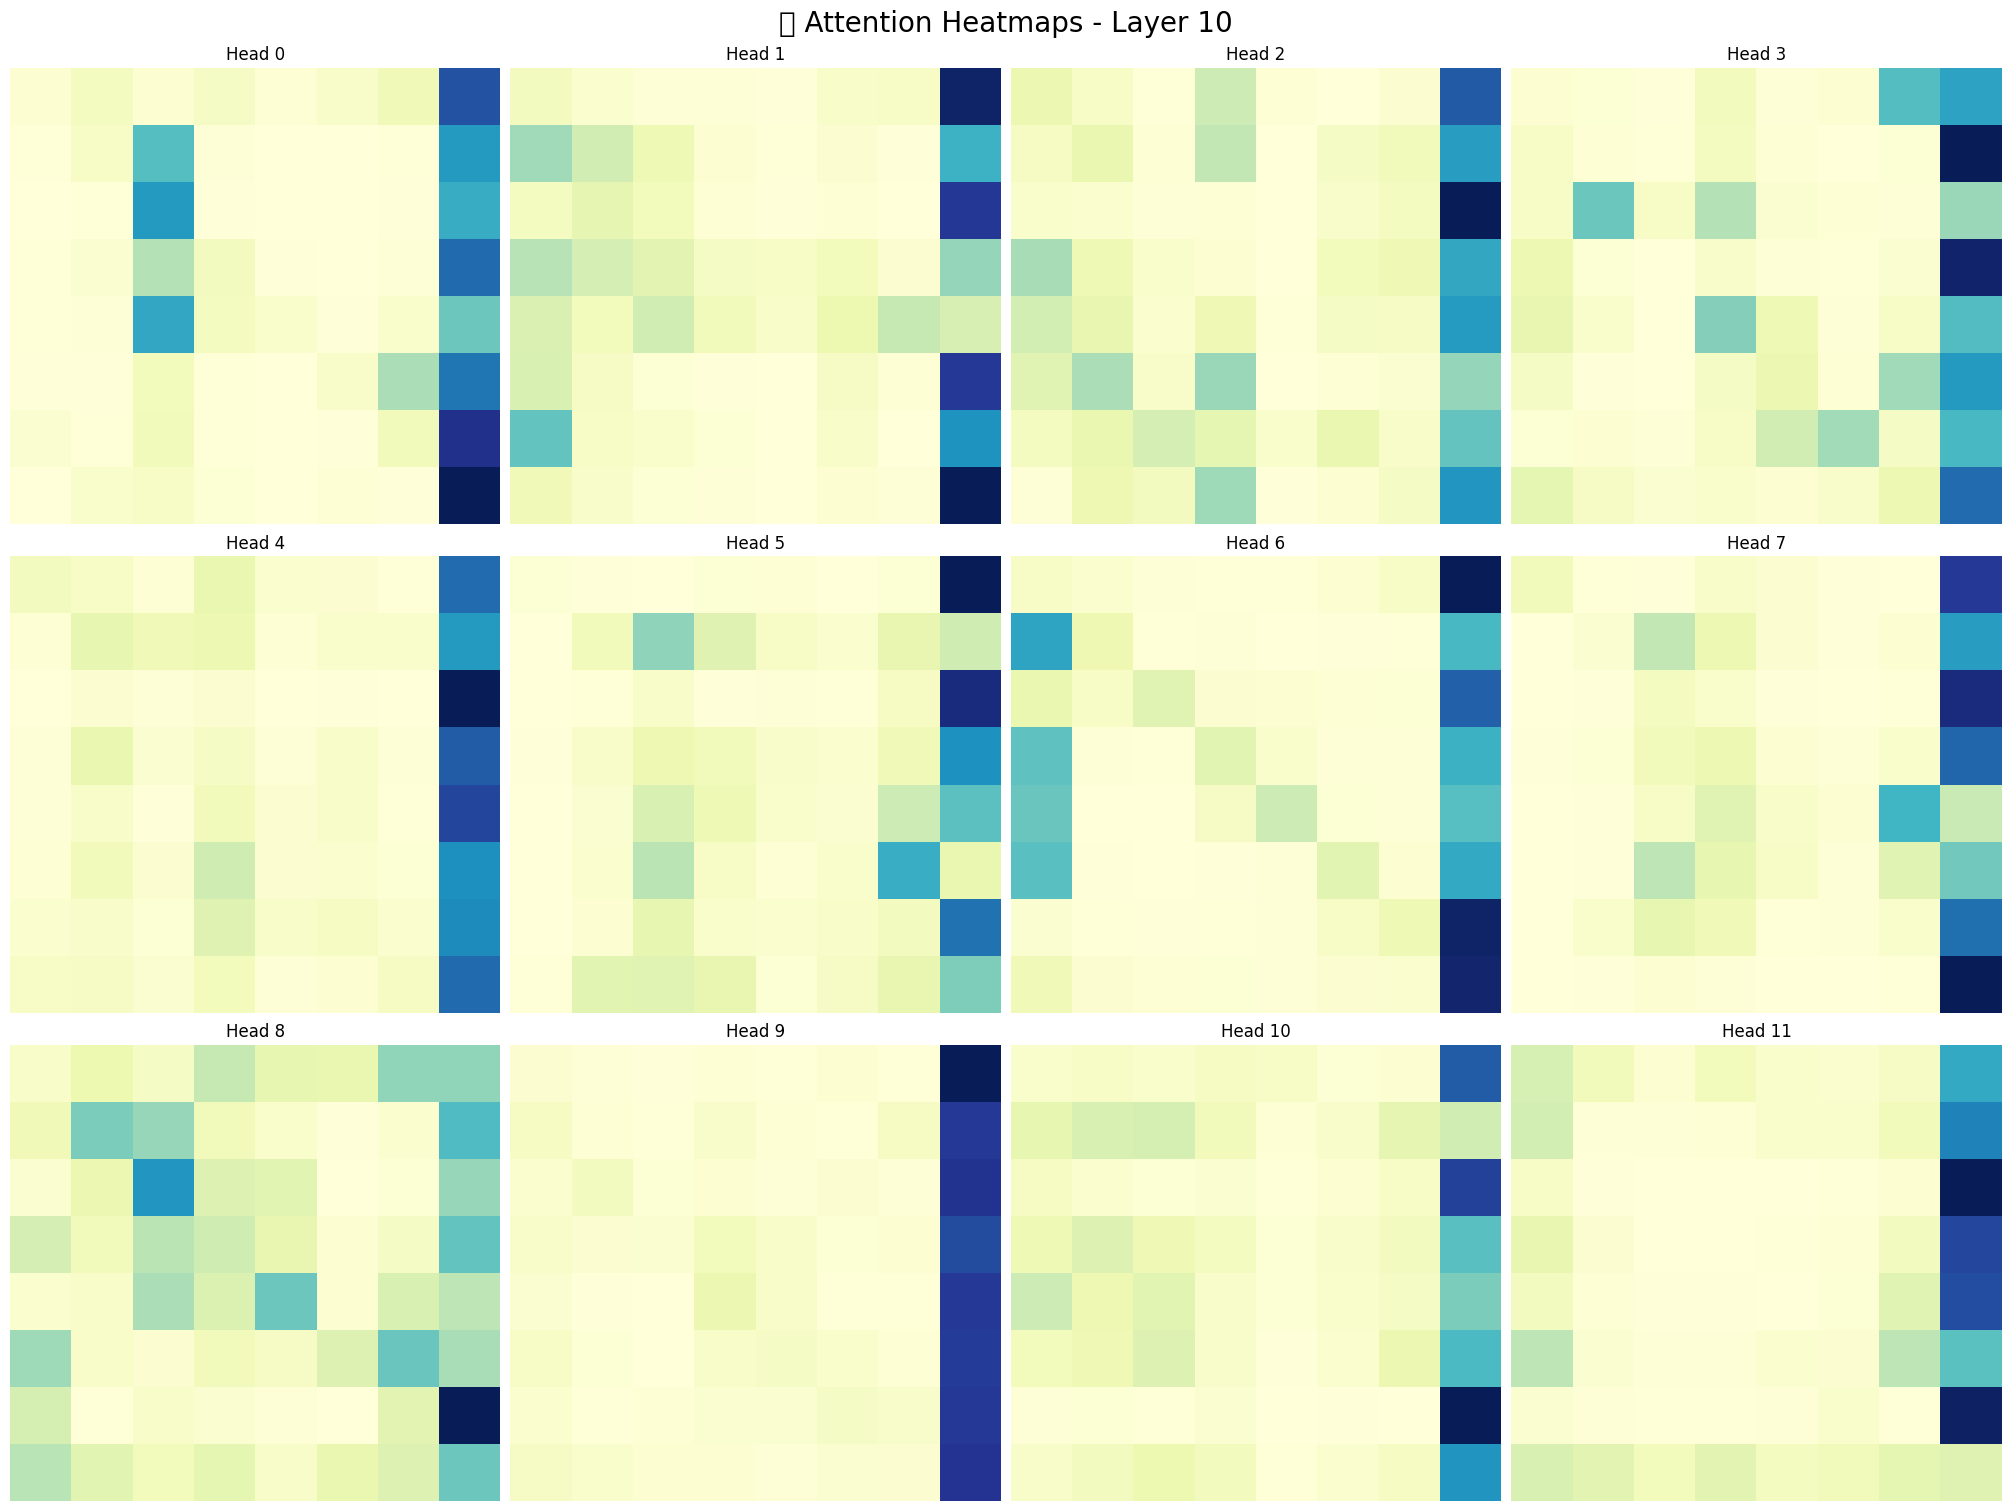


🔍 Layer 11/12


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


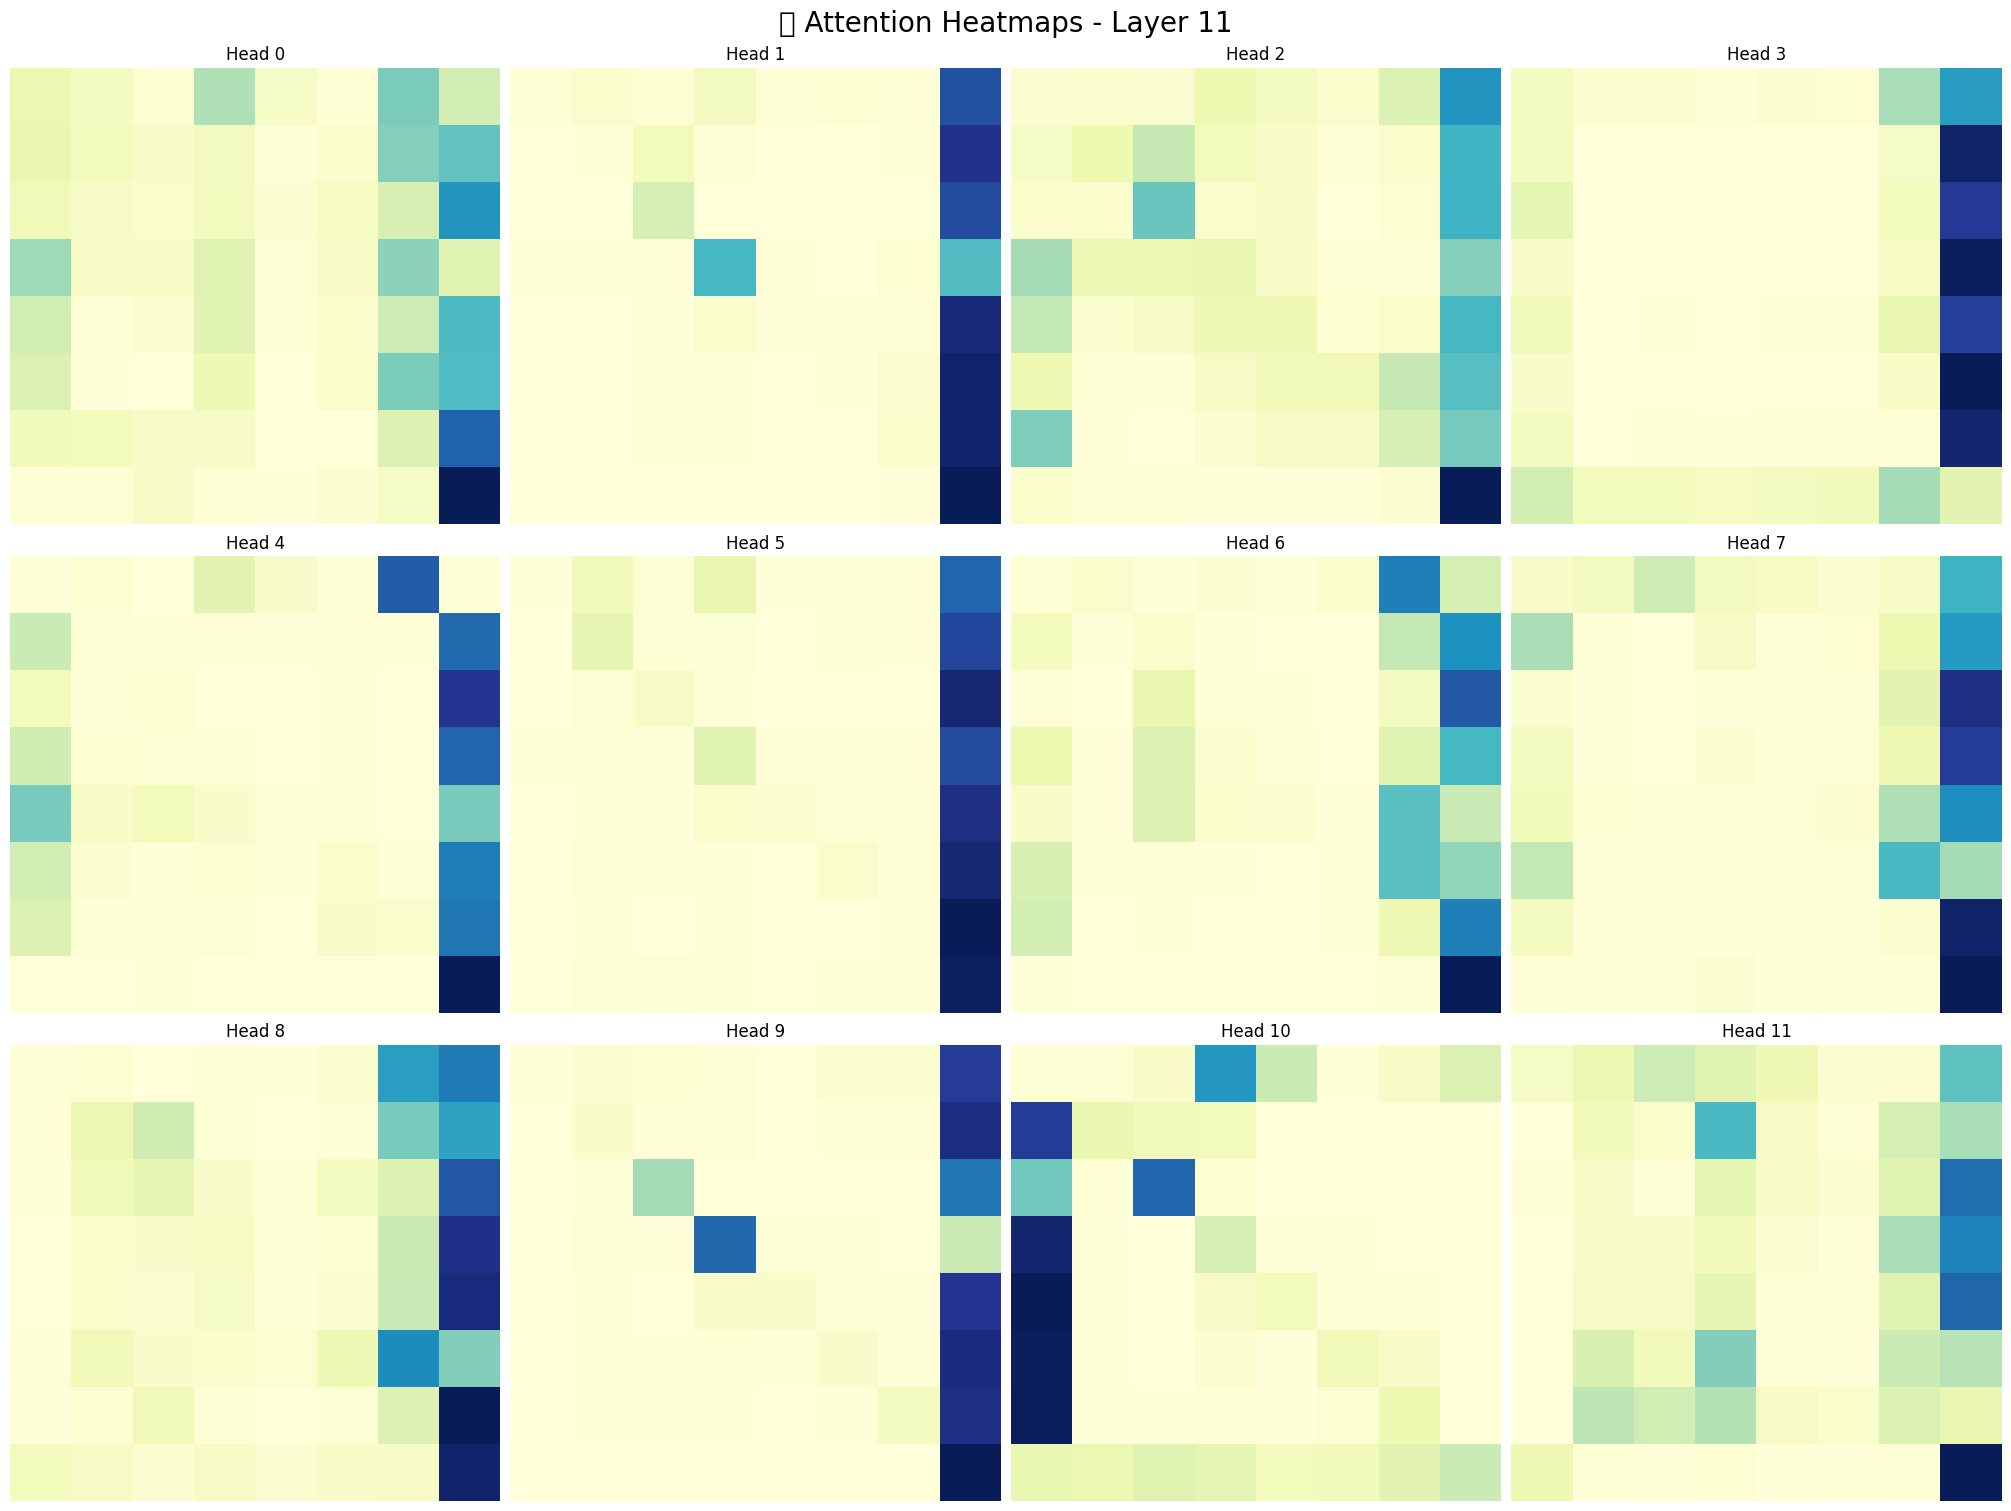


🔍 Layer 12/12


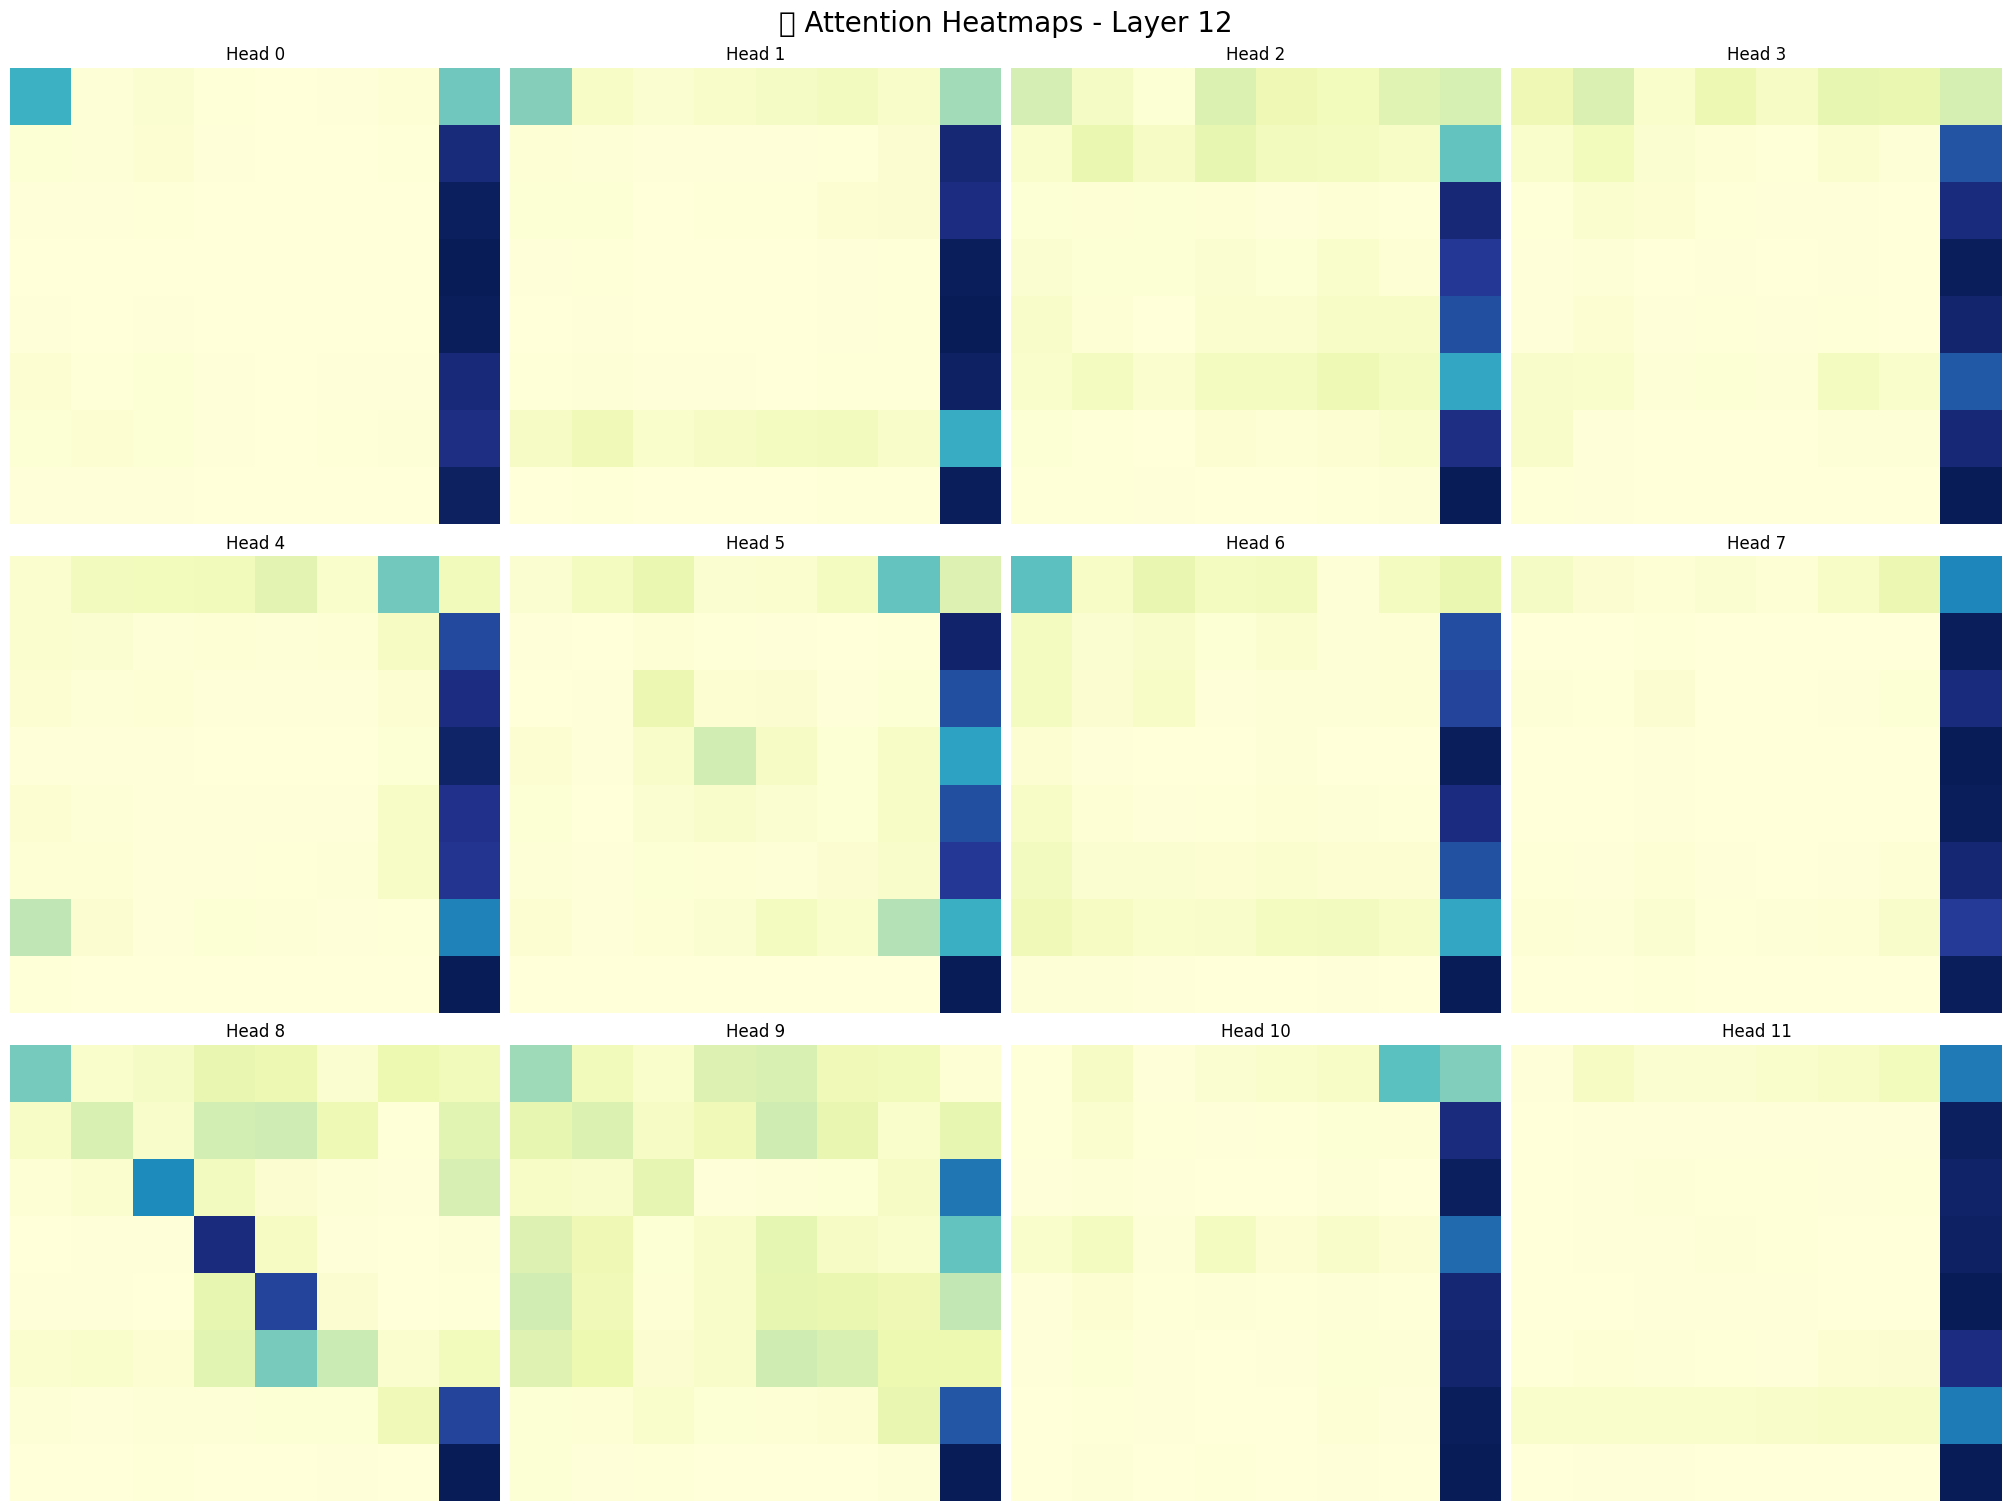

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_layers = attentions.shape[0]
num_heads = attentions.shape[2]

for layer in range(num_layers):
    print(f"\n🔍 Layer {layer + 1}/{num_layers}")

    fig, axes = plt.subplots(3, 4, figsize=(20, 15), constrained_layout=True)  # 3 rows x 4 cols

    for head in range(num_heads):
        row, col = divmod(head, 4)
        ax = axes[row][col]
        attention_matrix = attentions[layer, 0, head].numpy()

        sns.heatmap(attention_matrix, xticklabels=tokens, yticklabels=tokens,
                    cmap="YlGnBu", cbar=False, ax=ax)
        ax.set_title(f"Head {head}")
        ax.set_xticks([])
        ax.set_yticks([])

    fig.suptitle(f"🧠 Attention Heatmaps - Layer {layer + 1}", fontsize=20)
    plt.show()


In [ ]:
# Step 8: Find highest and lowest attended token (excluding special tokens)
token_data = [(i, tok, score) for i, (tok, score) in enumerate(zip(tokens, token_attention_scores)) if tok not in ['[CLS]', '[SEP]']]
high_attn_idx, high_token, _ = max(token_data, key=lambda x: x[2])
low_attn_idx, low_token, _ = min(token_data, key=lambda x: x[2])

print(f"🔍 High Attention Token: '{high_token}' at position {high_attn_idx}")
print(f"🫥 Low Attention Token: '{low_token}' at position {low_attn_idx}")


🔍 High Attention Token: 'mat' at position 6
🫥 Low Attention Token: 'on' at position 4


In [ ]:
# Step 9: Masking utility functions
def get_prediction(masked_inputs):
    with torch.no_grad():
        outputs = mlm_model(**masked_inputs)
    probs = torch.nn.functional.softmax(outputs.logits[0], dim=-1)
    masked_idx = (masked_inputs['input_ids'][0] == tokenizer.mask_token_id).nonzero(as_tuple=True)[0].item()
    top_prob, top_idx = probs[masked_idx].topk(1)
    return tokenizer.decode(top_idx), top_prob.item()

def mask_token(inputs, idx_to_mask):
    masked_inputs = {k: v.clone() for k, v in inputs.items()}
    masked_inputs['input_ids'][0, idx_to_mask] = tokenizer.mask_token_id
    return masked_inputs


In [ ]:
# Step 10: Predict after masking high and low attention tokens
high_masked_inputs = mask_token(inputs, high_attn_idx)
low_masked_inputs = mask_token(inputs, low_attn_idx)

high_pred, high_conf = get_prediction(high_masked_inputs)
low_pred, low_conf = get_prediction(low_masked_inputs)

print(f"🔁 Replacing HIGH-attn token '{high_token}' → predicted: '{high_pred}' with confidence {high_conf:.2f}")
print(f"🔁 Replacing LOW-attn token  '{low_token}' → predicted: '{low_pred}' with confidence {low_conf:.2f}")


🔁 Replacing HIGH-attn token 'mat' → predicted: '.' with confidence 0.94
🔁 Replacing LOW-attn token  'on' → predicted: 'on' with confidence 0.94


In [ ]:
# Step 11: Compare semantic change using [CLS] embedding (sentence-level meaning)
original_cls = outputs.last_hidden_state[0, 0]

def get_cls_embedding(masked_inputs):
    with torch.no_grad():
        masked_output = model(**masked_inputs)
    return masked_output.last_hidden_state[0, 0]

emb_high = get_cls_embedding(high_masked_inputs)
emb_low = get_cls_embedding(low_masked_inputs)

cos = torch.nn.CosineSimilarity(dim=0)
dist_high = 1 - cos(original_cls, emb_high)
dist_low = 1 - cos(original_cls, emb_low)

print(f"📐 Semantic Distance after masking HIGH-attn token: {dist_high:.4f}")
print(f"📐 Semantic Distance after masking LOW-attn token:  {dist_low:.4f}")


📐 Semantic Distance after masking HIGH-attn token: 0.0291
📐 Semantic Distance after masking LOW-attn token:  0.0247
